# Capstone Project 2 - Data Story
## Name: Brock Nosbisch

#### Summary:
This is a continuation from the "Capstone Project 2 - Data Wrangling" notebook. The data from the "Data Wrangling" notebook was written to the data_wrangling_out.csv file which is loaded into this notebook.  There are approximately 630,000 total records and approximately 340,000 records that are active as of the 3/1/2019 date.  
The date of 3/1/2019 was chosen at random so that I can predict the stops that happen within 7 days, 14 days, and 21 days of 3/1/2019.  The details of these observations can be found in the "Data Story Summary" section and additional details can be found in the Annex.

* The total stops that happened from 3/1/2019 to 3/7/2019 were 1243.
* The total stops that happened from 3/1/2019 to 3/14/2019 were 2390.
* The total stops that happened from 3/1/2019 to 3/21/2019 were 3449.
* The most frequent Start Date of the SAs that were stopped had started in October, November, and December of the previous year.
* When looking at stops during the 7 day, 14 day, and 21 day windows by City, Webb City, Joplin, Cameron, and Aurora had the highest % of Active SAs that were stopped.  Over 2% of all Active SAs in Aurora were stopped during the 21 day window.
* As expected, the Residential Customer Class had the most stops during all 3 of the time windows but less than 1% of all active Residential SAs were stopped.  The biggest offenders of stops during the 3 windows were Landlords and Builder/Developers.  14% of Landlord SAs were stopped during the 21 day window and 9% of Builder/Developer SAs were stopped during the same window.
* The % of stopped SAs that were DNPs during the 7 day window was 11%, 14 day window was 15%, and 21 day window was also 15%.
* The higher the arrears amount, the more likely you are to stop. For example, if you owe 100 or less then you have less than a 1% chance of stopping between 3/1/19 - 3/21/19.  If you owe $700-$799 then you have over a 6% chance of stopping in the same timeframe.  Residential customers have almost a 10% chance of stopping in the same bucket/timeframe.
* For Usage, it appears that the less you use, the higher chance you have of stopping service.  Overall, if you have used < 100 therms then you have almost a 6% chance of stopping.
* The shorter amount of time a customer has had gas service, the more likely the customer will stop gas.


Here are the definitions of the fields used in this project:
* CIS Division: Company
* Account ID: An account is owned by 1 person but can have multiple Service Agreements.
* Customer Class: Account level customer class.
* Person ID: A person can have multiple accounts.
* SA Start: The Service Agreement's Start Date (when gas started).
* SA End: The Service Agreement's End Date (when gas stopped).
* SA Status: The current SA status.
* SA Type: The Service Agreement's type (example: Gas Residential).
* Rate Class: Determines how the SA is billed.
* Premise ID: Unique identifier for an address.
* City: Premise's City
* State: Premise's State
* Postal: Premise's Zip Code
* Bill Cycle: How we know when to bill an Account.
* Service Type: Always Gas.
* Premise Type: Premise Type (example: Commercial).
* Office Location: Closest office to premise.
* DNP Started Flag: Was the previous stop a DNP.
* DNP Stopped Flag: Did the current SA Stop because of DNP.
* Internal Credit Rating: The internal credit rating for an Account.
* Premise Level 12 Month DNP Flag: Has the Premise had a DNP in the last 12 months.
* Account Level 12 Month DNP Flag: Has the Account had a DNP in the last 12 months.
* Person Received 18 Months Pledge: Has the Person received a Pledge in the last 18 months.
* Payments in Last 18 Months: How many payments have been made for the SA in the last 18 months.
* Bills in Last 18 Months: How many bills were billed for the SA in the last 18 months.
* Arrears Current/Payoff Amount: How much money is past due for the SA.
* Total Current/Payoff Amount: How much money is owed for the SA.
* Most Recent Payment Date: What was the most recent Payment Date.
* Late Payment Count: How many late payments were charged to the SA in the past 18 months.
* Seasonal Flags (1 year ago, 2 years ago, 3 years ago): Did the premise turn off between 3/1 and 6/30 and then turn on between 8/1 and 12/31.
* SA Start/End Degree: What was the Degree Days on the SA Start and SA End dates.
* Stop/Start Flags: Flags to show if the SA started/stopped in a given year.
* Pledge Date/Flag: The Pledge Date and Flag for each year.
* Usage in Last 18 Months: The Usage billed in the past 18 months.
* Person/Premise Min/Max SA Start/End Dates: What are the minimum and maximum start and end dates at a Person or Premise level.
* Person/Premise Days Active/Inactive Before: How many days was the previous SA for the Person or Premise Active or Inactive for.
* Stop Days from 20190301: Flags to use for training/testing.  This should be dynamic but we are hardcoding the value for now.

# Load Data

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns; sns.set(color_codes=True)
from datetime import datetime, date


# Functions #

def add_value_labels(ax, spacing=5):

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            # Vertical alignment
            va = 'top'

        label = "{:}".format(y_value)  # Use :.1f if wanting decimals.

        # Create annotation
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va=va) 
        

# Function: print_min_max
# Description: This function returns the Minimum or Maximum values of the field passed in.
#              We have hardcoded the df DataFrame.
# Valid values for parameters:
# dataframe = DataFrame
# field_name = name of field in the DF dataframe.
# min_max = min or max
# num = The number of records you want returned.
def print_min_max(dataframe, field_name, min_max = 'max', num = '5'):
    
    if min_max == 'max':
        tmpMinMax = False
    else:
        tmpMinMax = True
        
    #20190305 - tmp = 'df[\'' + field_name + '\'].value_counts().to_frame().reset_index().sort_values(\'index\', ascending=' + tmpMinMax + ').head(' + num + ')'
    print(dataframe[field_name].value_counts().to_frame().reset_index().sort_values('index', ascending=tmpMinMax).head(int(num)))
    
    return None
    
# print_min_max('df','unsecured_lines', 'min', '5')


file_name = 'data_wrangling_out.csv' # Service Agreement Level

df=pd.DataFrame()

# Read in the file with new column names.
df = pd.read_csv(file_name, header=0)

df.set_index('SA_ID', inplace=True)


# Change Data Types #
df = df.astype({'ACCOUNT_ID':'str', 
                'PERSON_ID':'str', 
                'SA_STATUS_FLAG':'str', 
                'PREMISE_ID':'str',
                'POSTAL':'str',
                'SA_START_YEAR':'str',
                'SA_START_YEAR_MONTH':'str',
                'SA_END_YEAR':'str',
                'SA_END_YEAR_MONTH':'str',
                'SA_START_DATE':'datetime64[ns]',
                'SA_END_DATE':'datetime64[ns]',
                'MOST_RECENT_PAYMENT_DATE':'datetime64[ns]',
                'PERSON_MAX_SA_START_DATE':'datetime64[ns]',
                'PERSON_MIN_SA_START_DATE':'datetime64[ns]',   
                'PERSON_MAX_SA_END_DATE':'datetime64[ns]',
                'PERSON_MIN_SA_END_DATE':'datetime64[ns]',
                'PREMISE_MAX_SA_START_DATE':'datetime64[ns]',
                'PREMISE_MIN_SA_START_DATE':'datetime64[ns]',
                'PREMISE_MAX_SA_END_DATE':'datetime64[ns]',
                'PREMISE_MIN_SA_END_DATE':'datetime64[ns]',
                'PREMISE_PRIOR_STOP_DATE':'datetime64[ns]',
                'PERSON_PRIOR_STOP_DATE':'datetime64[ns]',
                'PLEDGE_DATE_2013':'datetime64[ns]',
                'PLEDGE_DATE_2014':'datetime64[ns]',
                'PLEDGE_DATE_2015':'datetime64[ns]',
                'PLEDGE_DATE_2016':'datetime64[ns]',
                'PLEDGE_DATE_2017':'datetime64[ns]',
                'PLEDGE_DATE_2018':'datetime64[ns]',
                'PLEDGE_DATE_2019':'datetime64[ns]'
               })

# Create New Fields for Testing #

# 7 Days
df['STOP_7_DAYS_FROM_20190301'] = 0
df.loc[((df['SA_END_DATE'] >= datetime.strptime('3/1/2019', '%m/%d/%Y')) & (df['SA_END_DATE'] <= datetime.strptime('3/7/2019', '%m/%d/%Y'))), 'STOP_7_DAYS_FROM_20190301'] = 1

# 14 Days
df['STOP_14_DAYS_FROM_20190301'] = 0
df.loc[((df['SA_END_DATE'] >= datetime.strptime('3/1/2019', '%m/%d/%Y')) & (df['SA_END_DATE'] <= datetime.strptime('3/14/2019', '%m/%d/%Y'))), 'STOP_14_DAYS_FROM_20190301'] = 1

# 21 Days
df['STOP_21_DAYS_FROM_20190301'] = 0
df.loc[((df['SA_END_DATE'] >= datetime.strptime('3/1/2019', '%m/%d/%Y')) & (df['SA_END_DATE'] <= datetime.strptime('3/21/2019', '%m/%d/%Y'))), 'STOP_21_DAYS_FROM_20190301'] = 1

# Create an Arrears Payoff bucket based on every 10% quantile
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= -100) ), 'ARREARS_PAYOFF_BUCKET'] = 0
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= df['ARREARS_PAYOFF_AMOUNT'].quantile(.1)) ), 'ARREARS_PAYOFF_BUCKET'] = 1
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= df['ARREARS_PAYOFF_AMOUNT'].quantile(.2)) ), 'ARREARS_PAYOFF_BUCKET'] = 2
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= df['ARREARS_PAYOFF_AMOUNT'].quantile(.3)) ), 'ARREARS_PAYOFF_BUCKET'] = 3
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= df['ARREARS_PAYOFF_AMOUNT'].quantile(.4)) ), 'ARREARS_PAYOFF_BUCKET'] = 4
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= df['ARREARS_PAYOFF_AMOUNT'].quantile(.5)) ), 'ARREARS_PAYOFF_BUCKET'] = 5
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= df['ARREARS_PAYOFF_AMOUNT'].quantile(.6)) ), 'ARREARS_PAYOFF_BUCKET'] = 6
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= df['ARREARS_PAYOFF_AMOUNT'].quantile(.7)) ), 'ARREARS_PAYOFF_BUCKET'] = 7
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= df['ARREARS_PAYOFF_AMOUNT'].quantile(.8)) ), 'ARREARS_PAYOFF_BUCKET'] = 8
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= df['ARREARS_PAYOFF_AMOUNT'].quantile(.9)) ), 'ARREARS_PAYOFF_BUCKET'] = 9

# Create an Arrears Payoff bucket based on $100 increments
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= -100) ), 'ARREARS_PAYOFF_BUCKET_2'] = 0
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= 0) ), 'ARREARS_PAYOFF_BUCKET_2'] = 1
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= 100) ), 'ARREARS_PAYOFF_BUCKET_2'] = 2
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= 200) ), 'ARREARS_PAYOFF_BUCKET_2'] = 3
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= 300) ), 'ARREARS_PAYOFF_BUCKET_2'] = 4
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= 400) ), 'ARREARS_PAYOFF_BUCKET_2'] = 5
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= 500) ), 'ARREARS_PAYOFF_BUCKET_2'] = 6
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= 600) ), 'ARREARS_PAYOFF_BUCKET_2'] = 7
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= 700) ), 'ARREARS_PAYOFF_BUCKET_2'] = 8
df.loc[((df['ARREARS_PAYOFF_AMOUNT'] >= 800) ), 'ARREARS_PAYOFF_BUCKET_2'] = 9

# Create a Past 18 Months Usage buckets
# ('0 - 99','100 - 199','200 - 299','300 - 399','400 - 499','500 - 749','750 - 999','1000 - 1499','1500-2499','2500+')
df.loc[((df['USAGE_IN_LAST_18_MONTHS'] >= 0) ), 'USAGE_PAST_18_BUCKET'] = 0
df.loc[((df['USAGE_IN_LAST_18_MONTHS'] >= 100) ), 'USAGE_PAST_18_BUCKET'] = 1
df.loc[((df['USAGE_IN_LAST_18_MONTHS'] >= 200) ), 'USAGE_PAST_18_BUCKET'] = 2
df.loc[((df['USAGE_IN_LAST_18_MONTHS'] >= 300) ), 'USAGE_PAST_18_BUCKET'] = 3
df.loc[((df['USAGE_IN_LAST_18_MONTHS'] >= 400) ), 'USAGE_PAST_18_BUCKET'] = 4
df.loc[((df['USAGE_IN_LAST_18_MONTHS'] >= 500) ), 'USAGE_PAST_18_BUCKET'] = 5
df.loc[((df['USAGE_IN_LAST_18_MONTHS'] >= 750) ), 'USAGE_PAST_18_BUCKET'] = 6
df.loc[((df['USAGE_IN_LAST_18_MONTHS'] >= 1000) ), 'USAGE_PAST_18_BUCKET'] = 7
df.loc[((df['USAGE_IN_LAST_18_MONTHS'] >= 1500) ), 'USAGE_PAST_18_BUCKET'] = 8
df.loc[((df['USAGE_IN_LAST_18_MONTHS'] >= 2500) ), 'USAGE_PAST_18_BUCKET'] = 9

# Create a Number of Active Days bucket based on every 10% quantile
df.loc[((df['ACTIVE_DIFF_FROM_20190301'] >= -100) & (df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') ), 'CURRENT_DAYS_ACTIVE_BUCKET'] = 0
df.loc[((df['ACTIVE_DIFF_FROM_20190301'] >= df['ACTIVE_DIFF_FROM_20190301'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].quantile(.1)) & (df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') ), 'CURRENT_DAYS_ACTIVE_BUCKET'] = 1
df.loc[((df['ACTIVE_DIFF_FROM_20190301'] >= df['ACTIVE_DIFF_FROM_20190301'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].quantile(.2)) & (df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') ), 'CURRENT_DAYS_ACTIVE_BUCKET'] = 2
df.loc[((df['ACTIVE_DIFF_FROM_20190301'] >= df['ACTIVE_DIFF_FROM_20190301'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].quantile(.3)) & (df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') ), 'CURRENT_DAYS_ACTIVE_BUCKET'] = 3
df.loc[((df['ACTIVE_DIFF_FROM_20190301'] >= df['ACTIVE_DIFF_FROM_20190301'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].quantile(.4)) & (df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') ), 'CURRENT_DAYS_ACTIVE_BUCKET'] = 4
df.loc[((df['ACTIVE_DIFF_FROM_20190301'] >= df['ACTIVE_DIFF_FROM_20190301'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].quantile(.5)) & (df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') ), 'CURRENT_DAYS_ACTIVE_BUCKET'] = 5
df.loc[((df['ACTIVE_DIFF_FROM_20190301'] >= df['ACTIVE_DIFF_FROM_20190301'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].quantile(.6)) & (df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') ), 'CURRENT_DAYS_ACTIVE_BUCKET'] = 6
df.loc[((df['ACTIVE_DIFF_FROM_20190301'] >= df['ACTIVE_DIFF_FROM_20190301'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].quantile(.7)) & (df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') ), 'CURRENT_DAYS_ACTIVE_BUCKET'] = 7
df.loc[((df['ACTIVE_DIFF_FROM_20190301'] >= df['ACTIVE_DIFF_FROM_20190301'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].quantile(.8)) & (df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') ), 'CURRENT_DAYS_ACTIVE_BUCKET'] = 8
df.loc[((df['ACTIVE_DIFF_FROM_20190301'] >= df['ACTIVE_DIFF_FROM_20190301'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].quantile(.9)) & (df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') ), 'CURRENT_DAYS_ACTIVE_BUCKET'] = 9

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629614 entries, 98617454736 to 119996415468
Data columns (total 100 columns):
CIS_DIVISION                     629614 non-null object
ACCOUNT_ID                       629614 non-null object
CUSTOMER_CLASS_CODE              629614 non-null object
CUSTOMER_CLASS_DESCRIPTION       629614 non-null object
PERSON_ID                        629614 non-null object
SA_START_DATE                    629614 non-null datetime64[ns]
SA_START_YEAR                    629614 non-null object
SA_START_YEAR_MONTH              629614 non-null object
SA_END_DATE                      629614 non-null datetime64[ns]
SA_END_YEAR                      629614 non-null object
SA_END_YEAR_MONTH                629614 non-null object
SA_STATUS_FLAG                   629614 non-null object
SA_TYPE_CODE                     629614 non-null object
RATE_CLASS_CODE                  629614 non-null object
RATE_CLASS_DESCRIPTION           629614 non-null object
PREMISE_ID      

# Data Story Summary

The total count of stops for 7 days, 14 days, and 21 days.

In [145]:
print('Stops from 3/1/2019 to 3/7/2019 (7 Days):   {}'.format(df['STOP_7_DAYS_FROM_20190301'].loc[((df['STOP_7_DAYS_FROM_20190301'] == 1))].count()))
print('Stops from 3/1/2019 to 3/14/2019 (14 Days): {}'.format(df['STOP_14_DAYS_FROM_20190301'].loc[((df['STOP_14_DAYS_FROM_20190301'] == 1))].count()))
print('Stops from 3/1/2019 to 3/21/2019 (21 Days): {}'.format(df['STOP_21_DAYS_FROM_20190301'].loc[((df['STOP_21_DAYS_FROM_20190301'] == 1))].count()))

Stops from 3/1/2019 to 3/7/2019 (7 Days):   1243
Stops from 3/1/2019 to 3/14/2019 (14 Days): 2390
Stops from 3/1/2019 to 3/21/2019 (21 Days): 3449


The below graph shows that the majority of stops that happened within X days of 3/1/2019 were started in 2018.  For the 21 Day window, over 1400 of the 3449 stops were on SAs that started in 2018.

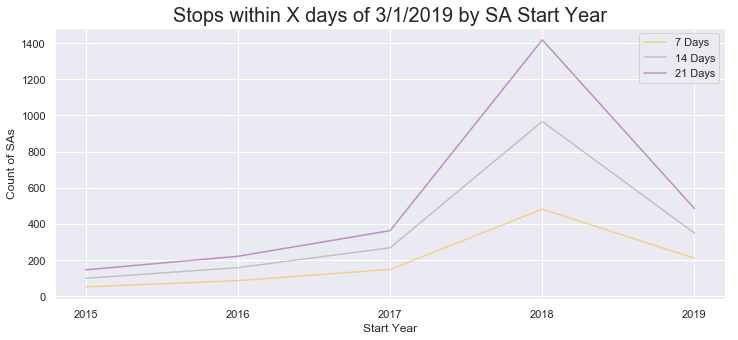

In [146]:
plt1_column_names = ('2015','2016','2017','2018','2019')

plt.figure(figsize=(12,5))
plt1 = df.loc[((df['STOP_7_DAYS_FROM_20190301'] == 1) & (df['SA_START_YEAR'] >= '2015'))].groupby('SA_START_YEAR')['STOP_7_DAYS_FROM_20190301'].sum().plot(kind='line', color='orange', alpha=.4, grid=True, label='7 Days')
plt1.set_title('Stops within X days of 3/1/2019 by SA Start Year',fontsize= 20)

plt2 = df.loc[((df['STOP_14_DAYS_FROM_20190301'] == 1) & (df['SA_START_YEAR'] >= '2015'))].groupby('SA_START_YEAR')['STOP_14_DAYS_FROM_20190301'].sum().plot(kind='line', color='gray', alpha=.4, grid=True, label='14 Days')

plt3 = df.loc[((df['STOP_21_DAYS_FROM_20190301'] == 1) & (df['SA_START_YEAR'] >= '2015'))].groupby('SA_START_YEAR')['STOP_21_DAYS_FROM_20190301'].sum().plot(kind='line', color='purple', alpha=.4, grid=True, label='21 Days')


plt1.set_xlabel('Start Year')
plt1.set_ylabel('Count of SAs')

plt1.set_xticks(np.arange(len(plt1_column_names)))

plt1.set_xticklabels(plt1_column_names)

h1, l1 = plt1.get_legend_handles_labels() 

plt.legend(loc=0)

plt.show()

The most frequent Start Date of the SAs that were stopped had started in October, November, and December of the previous year.

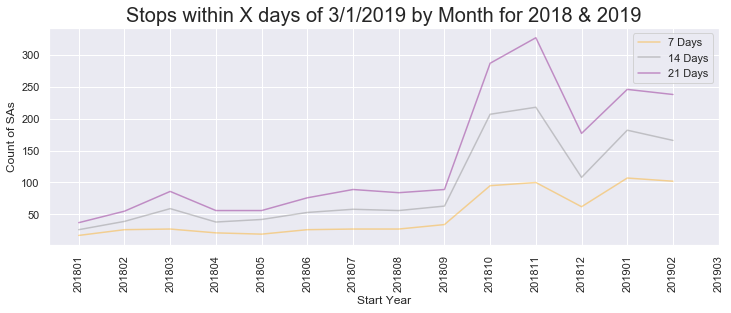

In [147]:

# Average # of Days Person was Off Before Starting Service
# Excluding Services that had another gas service at the same time which causes negative # of Days
# Only including a Person if they had service with us before.

plt1_column_names = ('201801','201802','201803','201804','201805','201806','201807','201808','201809','201810','201811','201812',
                     '201901','201902','201903'#,'201904','201905','201906','201907','201908','201909','201910','201911','201912'
                    )

plt.figure(figsize=(12,4))
plt1 = df.loc[((df['STOP_7_DAYS_FROM_20190301'] == 1) & (df['SA_START_YEAR_MONTH'] >= '201801'))].groupby('SA_START_YEAR_MONTH')['STOP_7_DAYS_FROM_20190301'].sum().plot(kind='line', color='orange', alpha=.4, grid=True, label='7 Days')
plt1.set_title('Stops within X days of 3/1/2019 by Month for 2018 & 2019',fontsize= 20)

plt2 = df.loc[((df['STOP_14_DAYS_FROM_20190301'] == 1) & (df['SA_START_YEAR_MONTH'] >= '201801'))].groupby('SA_START_YEAR_MONTH')['STOP_14_DAYS_FROM_20190301'].sum().plot(kind='line', color='gray', alpha=.4, grid=True, label='14 Days')

plt3 = df.loc[((df['STOP_21_DAYS_FROM_20190301'] == 1) & (df['SA_START_YEAR_MONTH'] >= '201801'))].groupby('SA_START_YEAR_MONTH')['STOP_21_DAYS_FROM_20190301'].sum().plot(kind='line', color='purple', alpha=.4, grid=True, label='21 Days')

plt.xticks(rotation=90)
plt1.set_xlabel('Start Year')
plt1.set_ylabel('Count of SAs')

plt1.set_xticks(np.arange(len(plt1_column_names)))

plt1.set_xticklabels(plt1_column_names)

h1, l1 = plt1.get_legend_handles_labels() 

plt.legend(loc=0)

plt.show()

### % of Active SAs that were Stopped by City by 7 Day, 14 Day, and 21 Day Buckets

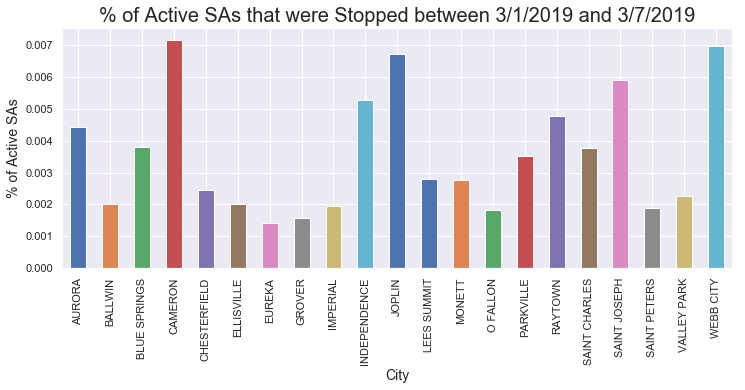

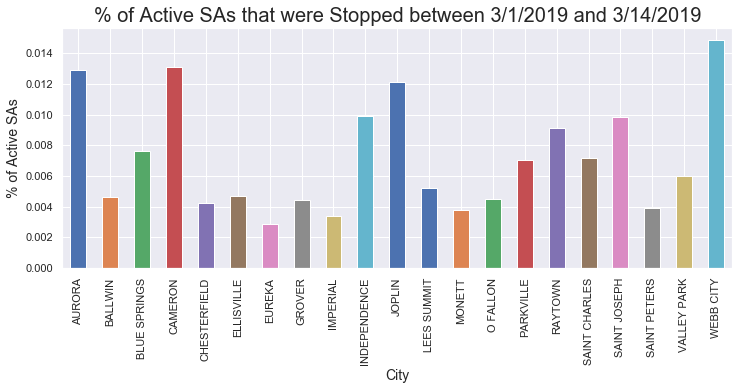

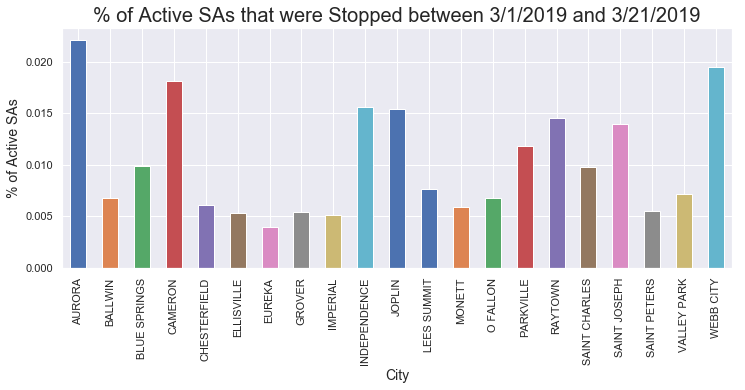

In [148]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)

plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CITY')['STOP_7_DAYS_FROM_20190301'].mean().plot(kind='bar')
plt1.set_title('% of Active SAs that were Stopped between 3/1/2019 and 3/7/2019',fontsize= 20)
plt1.set_xlabel('City',fontsize= 14)
plt1.set_ylabel('% of Active SAs',fontsize= 14)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,2)

plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CITY')['STOP_14_DAYS_FROM_20190301'].mean().plot(kind='bar')
plt1.set_title('% of Active SAs that were Stopped between 3/1/2019 and 3/14/2019',fontsize= 20)
plt1.set_xlabel('City',fontsize= 14)
plt1.set_ylabel('% of Active SAs',fontsize= 14)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,3)

plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CITY')['STOP_21_DAYS_FROM_20190301'].mean().plot(kind='bar')
plt1.set_title('% of Active SAs that were Stopped between 3/1/2019 and 3/21/2019',fontsize= 20)
plt1.set_xlabel('City',fontsize= 14)
plt1.set_ylabel('% of Active SAs',fontsize= 14)

plt.show()


### % of Active SAs that were Stopped by Customer Class by 7 Day, 14 Day, and 21 Day Buckets

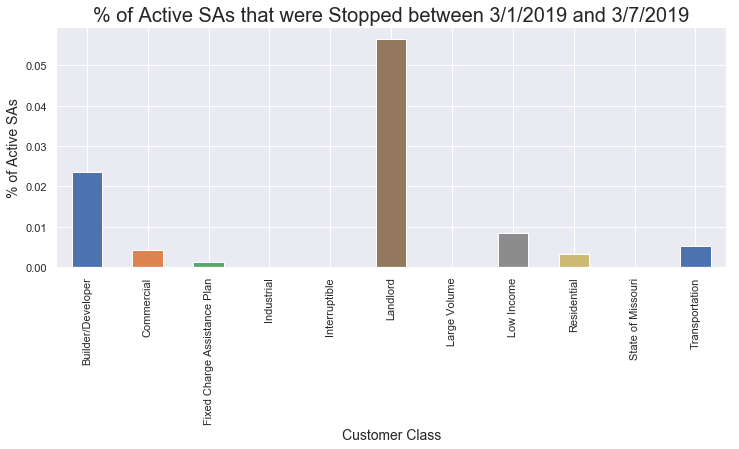

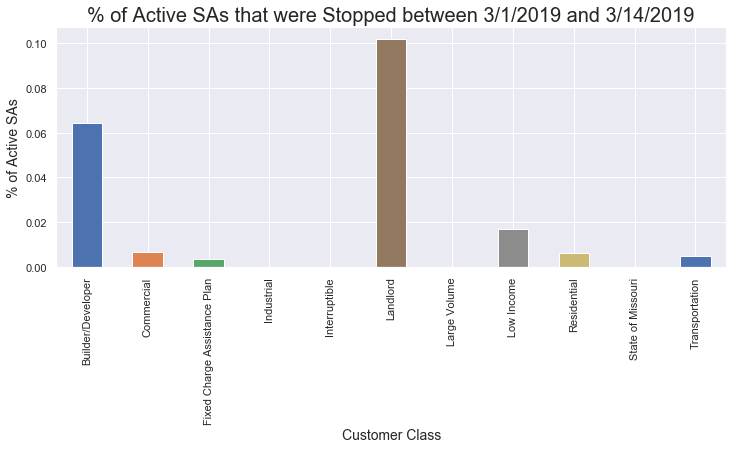

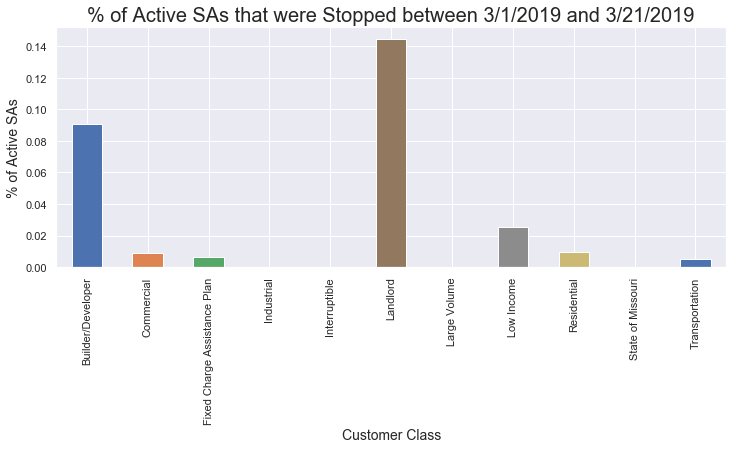

In [149]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)

plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CUSTOMER_CLASS_DESCRIPTION')['STOP_7_DAYS_FROM_20190301'].mean().plot(kind='bar')
plt1.set_title('% of Active SAs that were Stopped between 3/1/2019 and 3/7/2019',fontsize= 20)
plt1.set_xlabel('Customer Class',fontsize= 14)
plt1.set_ylabel('% of Active SAs',fontsize= 14)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,2)

plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CUSTOMER_CLASS_DESCRIPTION')['STOP_14_DAYS_FROM_20190301'].mean().plot(kind='bar')
plt1.set_title('% of Active SAs that were Stopped between 3/1/2019 and 3/14/2019',fontsize= 20)
plt1.set_xlabel('Customer Class',fontsize= 14)
plt1.set_ylabel('% of Active SAs',fontsize= 14)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,3)

plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CUSTOMER_CLASS_DESCRIPTION')['STOP_21_DAYS_FROM_20190301'].mean().plot(kind='bar')
plt1.set_title('% of Active SAs that were Stopped between 3/1/2019 and 3/21/2019',fontsize= 20)
plt1.set_xlabel('Customer Class',fontsize= 14)
plt1.set_ylabel('% of Active SAs',fontsize= 14)

plt.show()


### % of Active SAs that were previously Stopped because of DNP.

<Figure size 864x1080 with 0 Axes>

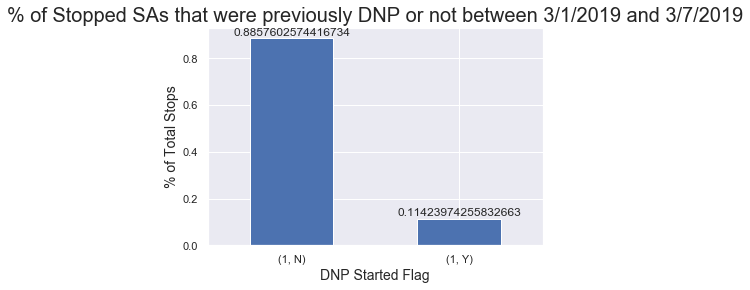

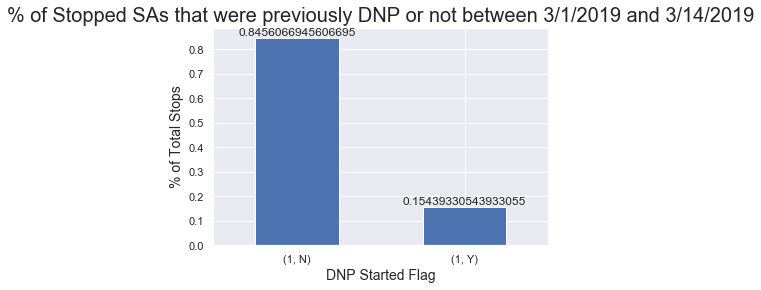

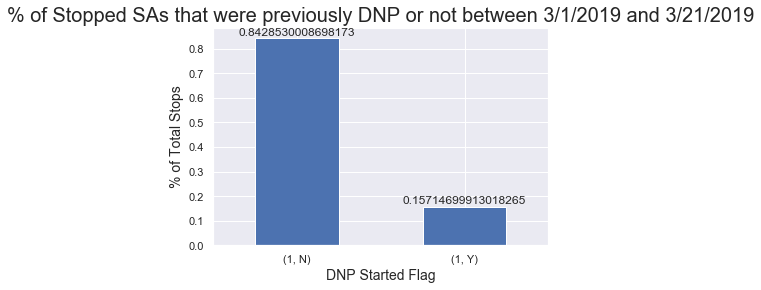

In [150]:

# Percentages
plt.figure(figsize=(12,15))

val1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_7_DAYS_FROM_20190301'] == 1 ))].groupby(['STOP_7_DAYS_FROM_20190301','DNP_STARTED_FLAG']).agg({'STOP_7_DAYS_FROM_20190301': 'sum'})
val2 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_7_DAYS_FROM_20190301'] == 1 ))].groupby('STOP_7_DAYS_FROM_20190301').agg({'STOP_7_DAYS_FROM_20190301': 'sum'})
val_out = val1.div(val2, level='STOP_7_DAYS_FROM_20190301') * 100

plt1 = val1.div(val2, level='STOP_7_DAYS_FROM_20190301').plot(kind='bar', legend=None)
plt1.set_title('% of Stopped SAs that were previously DNP or not between 3/1/2019 and 3/7/2019',fontsize= 20)
plt1.set_xlabel('DNP Started Flag',fontsize= 14)
plt1.set_ylabel('% of Total Stops',fontsize= 14)
plt.xticks(rotation=0)
add_value_labels(plt1,1)
plt.show()


val1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_14_DAYS_FROM_20190301'] == 1 ))].groupby(['STOP_14_DAYS_FROM_20190301','DNP_STARTED_FLAG']).agg({'STOP_14_DAYS_FROM_20190301': 'sum'})
val2 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_14_DAYS_FROM_20190301'] == 1 ))].groupby('STOP_14_DAYS_FROM_20190301').agg({'STOP_14_DAYS_FROM_20190301': 'sum'})
val_out = val1.div(val2, level='STOP_14_DAYS_FROM_20190301') * 100

plt2 = val1.div(val2, level='STOP_14_DAYS_FROM_20190301').plot(kind='bar', legend=None)
plt2.set_title('% of Stopped SAs that were previously DNP or not between 3/1/2019 and 3/14/2019',fontsize= 20)
plt2.set_xlabel('DNP Started Flag',fontsize= 14)
plt2.set_ylabel('% of Total Stops',fontsize= 14)
plt.xticks(rotation=0)
add_value_labels(plt2,1)
plt.show()


val1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_21_DAYS_FROM_20190301'] == 1 ))].groupby(['STOP_21_DAYS_FROM_20190301','DNP_STARTED_FLAG']).agg({'STOP_21_DAYS_FROM_20190301': 'sum'})
val2 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_21_DAYS_FROM_20190301'] == 1 ))].groupby('STOP_21_DAYS_FROM_20190301').agg({'STOP_21_DAYS_FROM_20190301': 'sum'})
val_out = val1.div(val2, level='STOP_21_DAYS_FROM_20190301') * 100

plt3 = val1.div(val2, level='STOP_21_DAYS_FROM_20190301').plot(kind='bar', legend=None)
plt3.set_title('% of Stopped SAs that were previously DNP or not between 3/1/2019 and 3/21/2019',fontsize= 20)
plt3.set_xlabel('DNP Started Flag',fontsize= 14)
plt3.set_ylabel('% of Total Stops',fontsize= 14)
plt.xticks(rotation=0)
add_value_labels(plt3,1)
plt.show()

### Arrears Owed for Stops Between 3/1/2019 and 3/21/2019

The total count of stopped between 3/1/2019 and 3/21/2019 is:   3449

Of those stops:
This is how many owed $1500 or more:   16
This is how many we owed $100 or more:   17
This is how many owed nothing:   798




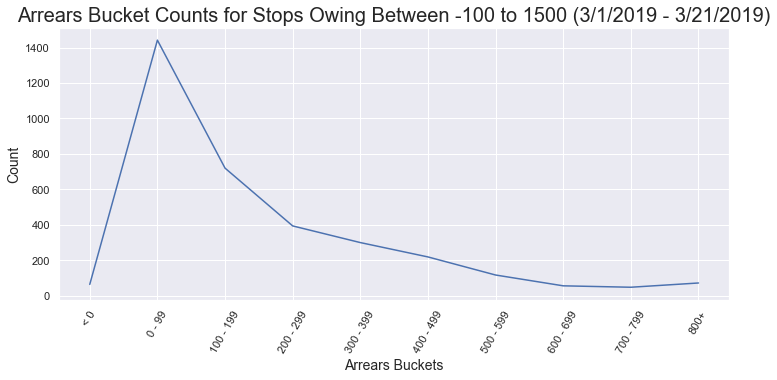

In [207]:
print('The total count of stopped between 3/1/2019 and 3/21/2019 is:   {}'.format(df['ACCOUNT_ID'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1) )].count()))
print()
print('Of those stops:')
print('This is how many owed $1500 or more:   {}'.format(df['ARREARS_PAYOFF_AMOUNT'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1) & (df['ARREARS_PAYOFF_AMOUNT'] >= 1500))].count()))
print('This is how many we owed $100 or more:   {}'.format(df['ARREARS_PAYOFF_AMOUNT'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1) & (df['ARREARS_PAYOFF_AMOUNT'] <= -100))].count()))
print('This is how many owed nothing:   {}'.format(df['ARREARS_PAYOFF_AMOUNT'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1) & (df['ARREARS_PAYOFF_AMOUNT'] == 0))].count()))
print()
print()

plt.figure(figsize=(12,5))

arrears_bucket_columns_2 = ('< 0','0 - 99','100 - 199','200 - 299','300 - 399','400 - 499','500 - 599','600 - 699','700 - 799','800+')
_ = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_21_DAYS_FROM_20190301'] == 1 ))].groupby('ARREARS_PAYOFF_BUCKET_2')['STOP_21_DAYS_FROM_20190301'].count().plot(kind='line',grid=True)
_.set_title('Arrears Bucket Counts for Stops Owing Between -100 to 1500 (3/1/2019 - 3/21/2019)', fontsize=20)
_.set_xlabel('Arrears Buckets', fontsize=14)
_.set_ylabel('Count', fontsize=14)
_.set_xticks(np.arange(0, 10, step=1))
_.set_xticklabels(arrears_bucket_columns_2, rotation=60)
add_value_labels(_,1)
plt.show()

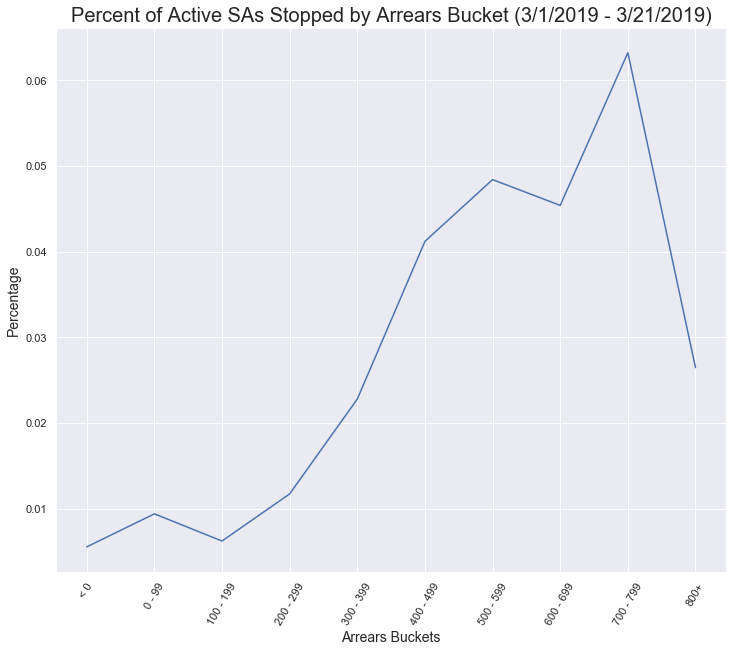

In [153]:
plt.figure(figsize=(12,10))

arrears_bucket_columns_2 = ('< 0','0 - 99','100 - 199','200 - 299','300 - 399','400 - 499','500 - 599','600 - 699','700 - 799','800+')
_ = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('ARREARS_PAYOFF_BUCKET_2')['STOP_21_DAYS_FROM_20190301'].mean().plot(kind='line',grid=True)
_.set_title('Percent of Active SAs Stopped by Arrears Bucket (3/1/2019 - 3/21/2019)', fontsize=20)
_.set_xlabel('Arrears Buckets', fontsize=14)
_.set_ylabel('Percentage', fontsize=14)
_.set_xticks(np.arange(0, 10, step=1))
_.set_xticklabels(arrears_bucket_columns_2, rotation=60)
add_value_labels(_,1)
plt.show()

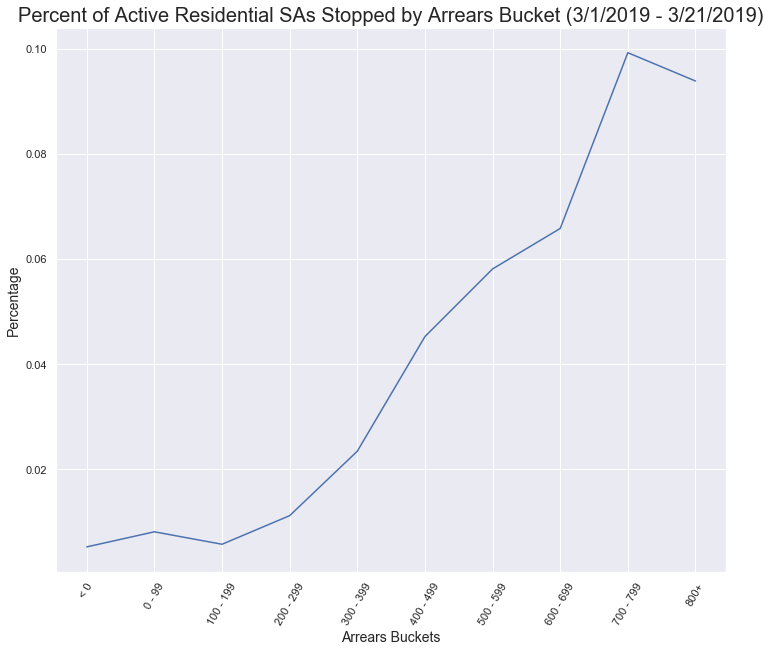

In [154]:
#df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('ARREARS_PAYOFF_BUCKET_2')['ARREARS_PAYOFF_AMOUNT'].min()
plt.figure(figsize=(12,10))

arrears_bucket_columns_2 = ('< 0','0 - 99','100 - 199','200 - 299','300 - 399','400 - 499','500 - 599','600 - 699','700 - 799','800+')
_ = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['CUSTOMER_CLASS_DESCRIPTION'] == 'Residential' ))].groupby('ARREARS_PAYOFF_BUCKET_2')['STOP_21_DAYS_FROM_20190301'].mean().plot(kind='line',grid=True)
_.set_title('Percent of Active Residential SAs Stopped by Arrears Bucket (3/1/2019 - 3/21/2019)', fontsize=20)
_.set_xlabel('Arrears Buckets', fontsize=14)
_.set_ylabel('Percentage', fontsize=14)
_.set_xticks(np.arange(0, 10, step=1))
_.set_xticklabels(arrears_bucket_columns_2, rotation=60)
add_value_labels(_,1)
plt.show()

The total count of stopped between 3/1/2019 and 3/21/2019 is:   3449

Of those stops, how much usage did each use in the past 18 months:
This is how many used > 5000:   17
This is how many used < 10:   70
This is how many did not use any:   29




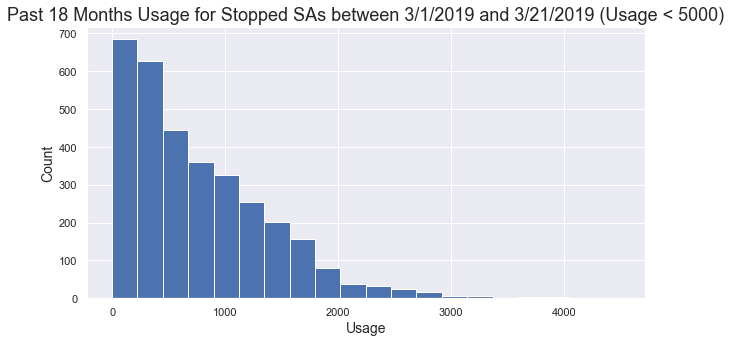

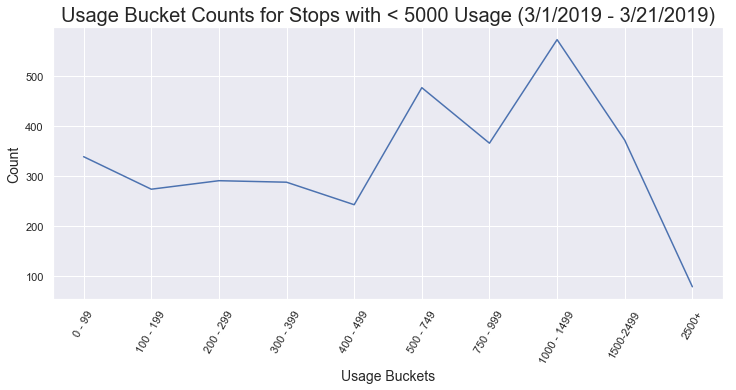

In [156]:
#df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('ARREARS_PAYOFF_BUCKET_2')['ARREARS_PAYOFF_AMOUNT'].min()
plt.figure(figsize=(12,5))

usage_bucket_columns = ('0 - 99','100 - 199','200 - 299','300 - 399','400 - 499','500 - 749','750 - 999','1000 - 1499','1500-2499','2500+')
_ = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_21_DAYS_FROM_20190301'] == 1 ))].groupby('USAGE_PAST_18_BUCKET')['STOP_21_DAYS_FROM_20190301'].count().plot(kind='line',grid=True)
_.set_title('Usage Bucket Counts for Stops with < 5000 Usage (3/1/2019 - 3/21/2019)', fontsize=20)
_.set_xlabel('Usage Buckets', fontsize=14)
_.set_ylabel('Count', fontsize=14)
_.set_xticks(np.arange(0, 10, step=1))
_.set_xticklabels(usage_bucket_columns, rotation=60)
add_value_labels(_,1)
plt.show()

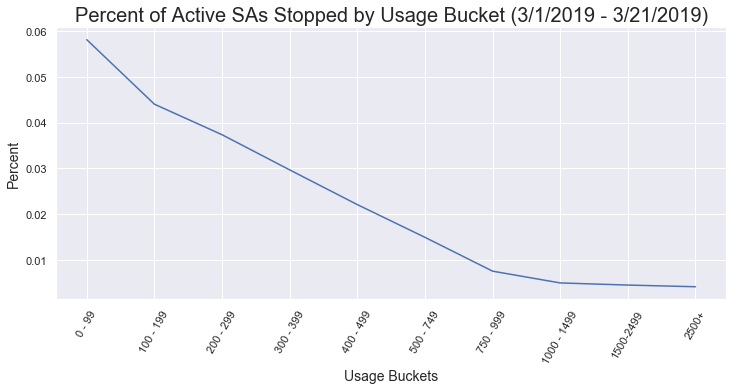

In [157]:
#df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('ARREARS_PAYOFF_BUCKET_2')['ARREARS_PAYOFF_AMOUNT'].min()
plt.figure(figsize=(12,5))

usage_bucket_columns = ('0 - 99','100 - 199','200 - 299','300 - 399','400 - 499','500 - 749','750 - 999','1000 - 1499','1500-2499','2500+')
_ = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('USAGE_PAST_18_BUCKET')['STOP_21_DAYS_FROM_20190301'].mean().plot(kind='line',grid=True)
_.set_title('Percent of Active SAs Stopped by Usage Bucket (3/1/2019 - 3/21/2019)', fontsize=20)
_.set_xlabel('Usage Buckets', fontsize=14)
_.set_ylabel('Percent', fontsize=14)
_.set_xticks(np.arange(0, 10, step=1))
_.set_xticklabels(usage_bucket_columns, rotation=60)
add_value_labels(_,1)
plt.show()

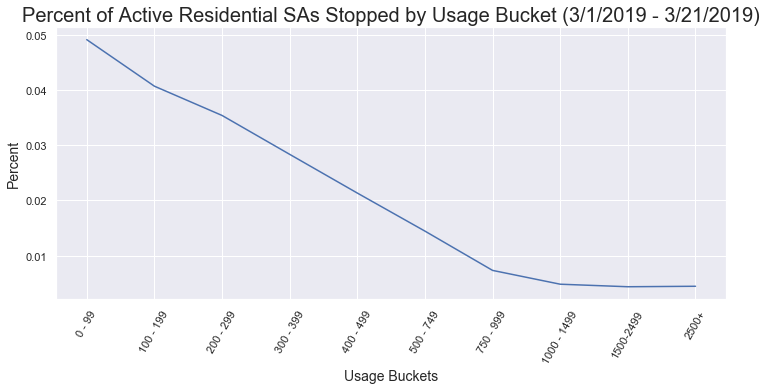

In [158]:
#df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('ARREARS_PAYOFF_BUCKET_2')['ARREARS_PAYOFF_AMOUNT'].min()
plt.figure(figsize=(12,5))

usage_bucket_columns = ('0 - 99','100 - 199','200 - 299','300 - 399','400 - 499','500 - 749','750 - 999','1000 - 1499','1500-2499','2500+')
_ = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['CUSTOMER_CLASS_DESCRIPTION'] == 'Residential' ) )].groupby('USAGE_PAST_18_BUCKET')['STOP_21_DAYS_FROM_20190301'].mean().plot(kind='line',grid=True)
_.set_title('Percent of Active Residential SAs Stopped by Usage Bucket (3/1/2019 - 3/21/2019)', fontsize=20)
_.set_xlabel('Usage Buckets', fontsize=14)
_.set_ylabel('Percent', fontsize=14)
_.set_xticks(np.arange(0, 10, step=1))
_.set_xticklabels(usage_bucket_columns, rotation=60)
add_value_labels(_,1)
plt.show()

The total count of stopped between 3/1/2019 and 3/21/2019 is:   3449

Of those stops, how much usage did each use in the past 18 months:
This is how many were active for 10+ years:   454
This is how many were active for 5-10 years old:   272
This is how many did not use any:   0


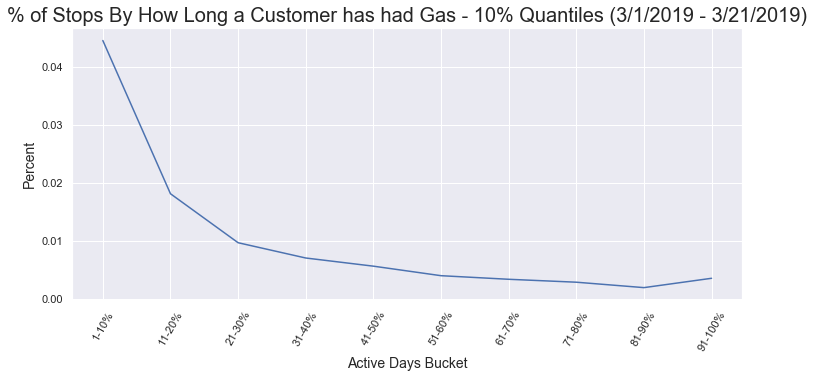

In [211]:
print('The total count of stopped between 3/1/2019 and 3/21/2019 is:   {}'.format(df['ACCOUNT_ID'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1) )].count()))
print()
print('Of those stops, how much usage did each use in the past 18 months:')
print('This is how many were active for 10+ years:   {}'.format(df['ACTIVE_DIFF_FROM_20190301'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1) & (df['ACTIVE_DIFF_FROM_20190301'] >= 3650))].count()))
print('This is how many were active for 5-10 years old:   {}'.format(df['ACTIVE_DIFF_FROM_20190301'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1) & (df['ACTIVE_DIFF_FROM_20190301'] >= 1825) & (df['ACTIVE_DIFF_FROM_20190301'] < 3650))].count()))
print('This is how many did not use any:   {}'.format(df['ACTIVE_DIFF_FROM_20190301'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1) & (df['ACTIVE_DIFF_FROM_20190301'] == 0))].count()))

plt.figure(figsize=(12,5))

usage_bucket_columns = ('1-10%','11-20%','21-30%','31-40%','41-50%','51-60%','61-70%','71-80%','81-90%','91-100%','')
_ = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  )].groupby('CURRENT_DAYS_ACTIVE_BUCKET')['STOP_21_DAYS_FROM_20190301'].mean().plot(kind='line',grid=True)
_.set_title('% of Stops By How Long a Customer has had Gas - 10% Quantiles (3/1/2019 - 3/21/2019)', fontsize=20)
_.set_xlabel('Active Days Bucket', fontsize=14)
_.set_ylabel('Percent', fontsize=14)
_.set_xticks(np.arange(0, 10, step=1))
_.set_xticklabels(usage_bucket_columns, rotation=60)
add_value_labels(_,1)
plt.show()

### Write data to file to use in Data Story

In [164]:
filename = 'data_story_out.csv'
df.to_csv(filename)

## ANNEX

The total count of stopped between 3/1/2019 and 3/21/2019 is:   3449

Of those stops, how much usage did each use in the past 18 months:
This is how many used > 5000:   17
This is how many used < 10:   70
This is how many did not use any:   29




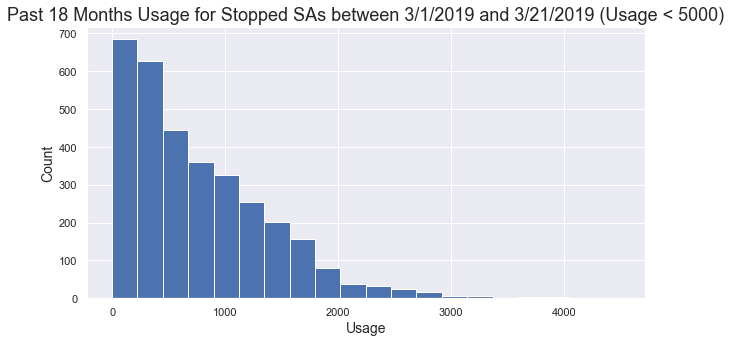

In [209]:
print('The total count of stopped between 3/1/2019 and 3/21/2019 is:   {}'.format(df['ACCOUNT_ID'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1) )].count()))
print()
print('Of those stops, how much usage did each use in the past 18 months:')
print('This is how many used > 5000:   {}'.format(df['USAGE_IN_LAST_18_MONTHS'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1) & (df['USAGE_IN_LAST_18_MONTHS'] >= 5000))].count()))
print('This is how many used < 10:   {}'.format(df['USAGE_IN_LAST_18_MONTHS'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1) & (df['USAGE_IN_LAST_18_MONTHS'] < 10))].count()))
print('This is how many did not use any:   {}'.format(df['USAGE_IN_LAST_18_MONTHS'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1) & (df['USAGE_IN_LAST_18_MONTHS'] == 0))].count()))
print()
print()
plt.figure(figsize=(10,5))
_ = df['USAGE_IN_LAST_18_MONTHS'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1) & (df['USAGE_IN_LAST_18_MONTHS'] < 5000) )].plot(kind='hist', grid=True, bins=20)
_.set_title('Past 18 Months Usage for Stopped SAs between 3/1/2019 and 3/21/2019 (Usage < 5000)', fontsize=18)
_.set_xlabel('Usage', fontsize=14)
_.set_ylabel('Count', fontsize=14)

plt.show()

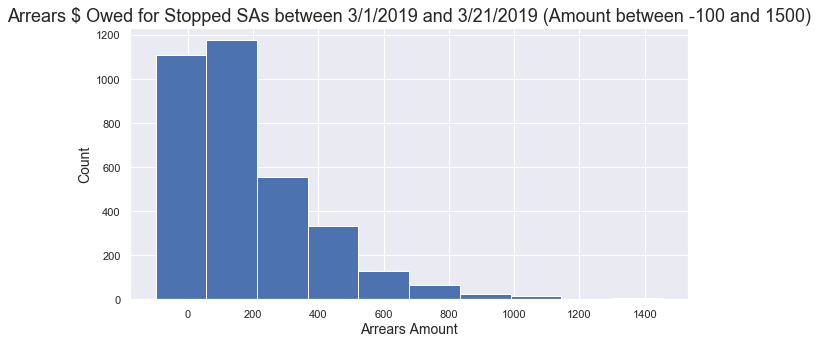

In [206]:

plt.figure(figsize=(10,5))
_ = df['ARREARS_PAYOFF_AMOUNT'][((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1) & (df['ARREARS_PAYOFF_AMOUNT']  < 1500) & (df['ARREARS_PAYOFF_AMOUNT'] > -100))].plot(kind='hist', grid=True, bins=10)
_.set_title('Arrears $ Owed for Stopped SAs between 3/1/2019 and 3/21/2019 (Amount between -100 and 1500)', fontsize=18)
_.set_xlabel('Arrears Amount', fontsize=14)
_.set_ylabel('Count', fontsize=14)

plt.show()

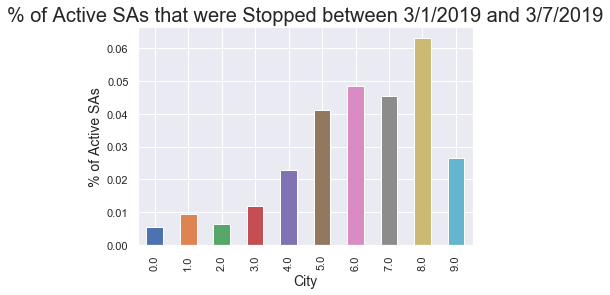

In [165]:
plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('ARREARS_PAYOFF_BUCKET_2')['STOP_21_DAYS_FROM_20190301'].mean().plot(kind='bar')
plt1.set_title('% of Active SAs that were Stopped between 3/1/2019 and 3/7/2019',fontsize= 20)
plt1.set_xlabel('City',fontsize= 14)
plt1.set_ylabel('% of Active SAs',fontsize= 14)

plt.show()

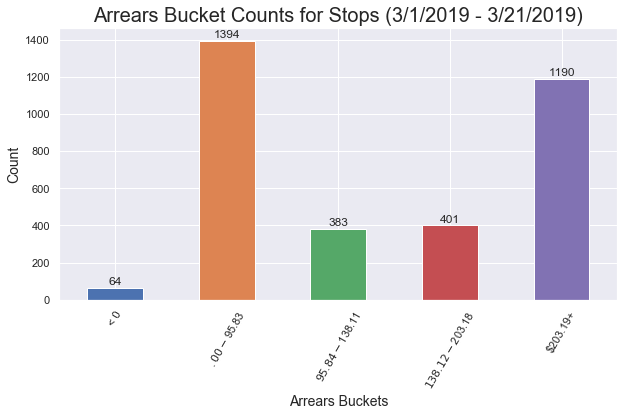

In [166]:
#df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('ARREARS_PAYOFF_BUCKET')['ARREARS_PAYOFF_AMOUNT'].min()

plt.figure(figsize=(10,5))

arrears_bucket_columns = ('< 0','$.00 - $95.83','$95.84 - $138.11','$138.12 - $203.18','$203.19+')
_ = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_21_DAYS_FROM_20190301'] == 1 ))].groupby('ARREARS_PAYOFF_BUCKET')['STOP_21_DAYS_FROM_20190301'].count().plot(kind='bar')
_.set_title('Arrears Bucket Counts for Stops (3/1/2019 - 3/21/2019)', fontsize=20)
_.set_xlabel('Arrears Buckets', fontsize=14)
_.set_ylabel('Count', fontsize=14)
_.set_xticklabels(arrears_bucket_columns, rotation=60)
add_value_labels(_,1)
plt.show()

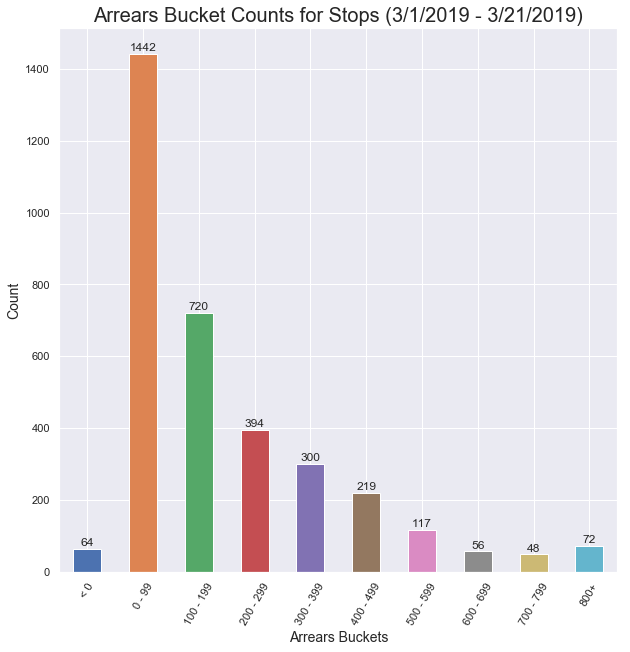

In [167]:
#df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('ARREARS_PAYOFF_BUCKET_2')['ARREARS_PAYOFF_AMOUNT'].min()

plt.figure(figsize=(10,10))

arrears_bucket_columns_2 = ('< 0','0 - 99','100 - 199','200 - 299','300 - 399','400 - 499','500 - 599','600 - 699','700 - 799','800+')
_ = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_21_DAYS_FROM_20190301'] == 1 ))].groupby('ARREARS_PAYOFF_BUCKET_2')['STOP_21_DAYS_FROM_20190301'].count().plot(kind='bar')
_.set_title('Arrears Bucket Counts for Stops (3/1/2019 - 3/21/2019)', fontsize=20)
_.set_xlabel('Arrears Buckets', fontsize=14)
_.set_ylabel('Count', fontsize=14)
_.set_xticklabels(arrears_bucket_columns_2, rotation=60)
add_value_labels(_,1)
plt.show()

### Histograms of SAs that were Active on 3/1/2019


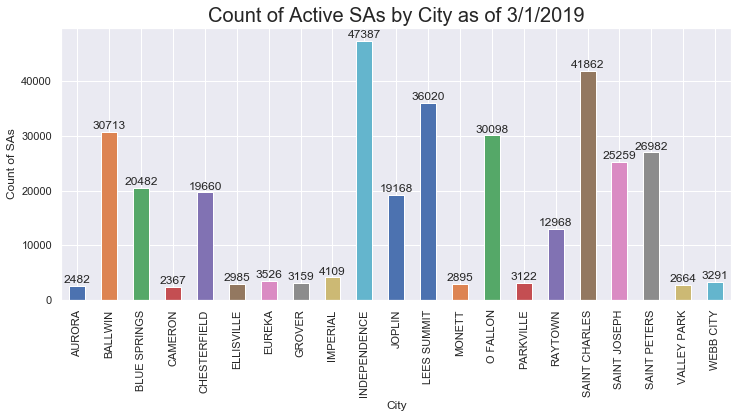

In [168]:
plt.figure(figsize=(12,5))
plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903'))].groupby('CITY')['STOP_7_DAYS_FROM_20190301'].count().plot(kind='bar')
plt1.set_title('Count of Active SAs by City as of 3/1/2019',fontsize= 20)
plt1.set_xlabel('City')
plt1.set_ylabel('Count of SAs')
add_value_labels(plt1,1)

plt.show()


### Total Counts of Stopped SAs by City by 7 Day, 14 Day, and 21 Day Buckets

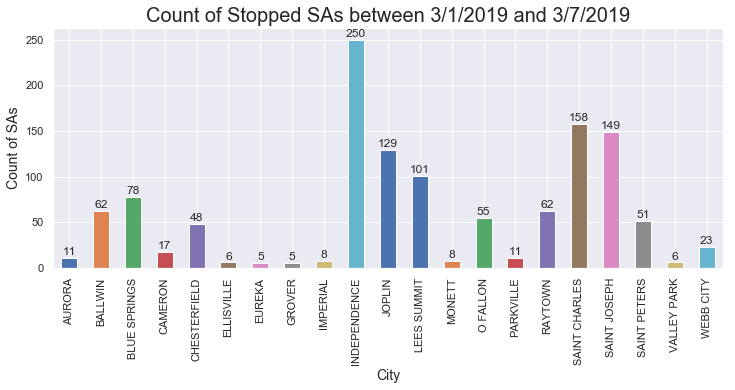

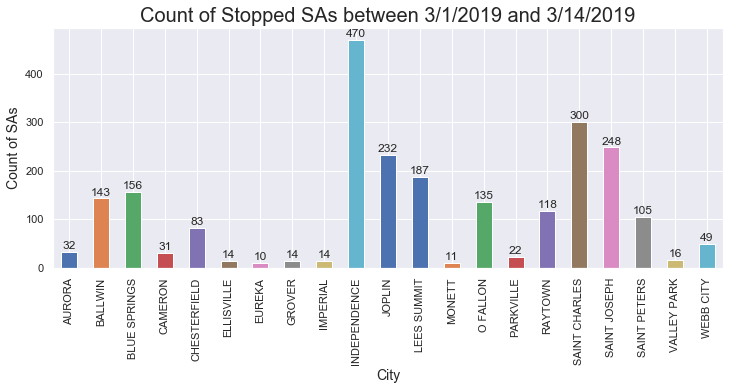

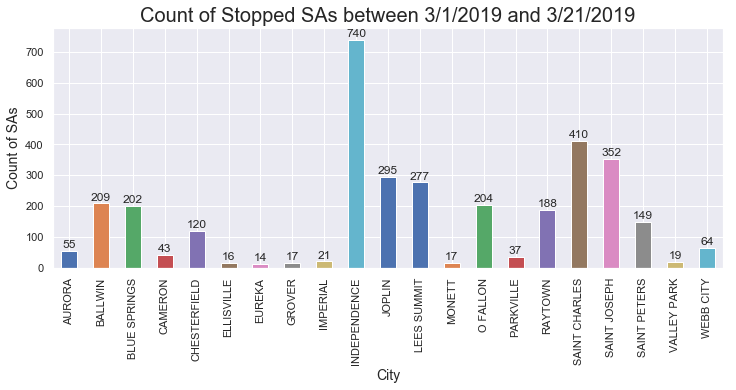

In [169]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)
plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903'))].groupby('CITY')['STOP_7_DAYS_FROM_20190301'].sum().plot(kind='bar')
plt1.set_title('Count of Stopped SAs between 3/1/2019 and 3/7/2019',fontsize= 20)
plt1.set_xlabel('City',fontsize= 14)
plt1.set_ylabel('Count of SAs',fontsize= 14)
add_value_labels(plt1,1)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,2)
plt2 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903'))].groupby('CITY')['STOP_14_DAYS_FROM_20190301'].sum().plot(kind='bar')
plt2.set_title('Count of Stopped SAs between 3/1/2019 and 3/14/2019',fontsize= 20)
plt2.set_xlabel('City',fontsize= 14)
plt2.set_ylabel('Count of SAs',fontsize= 14)
add_value_labels(plt2,1)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,3)

plt3 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903'))].groupby('CITY')['STOP_21_DAYS_FROM_20190301'].sum().plot(kind='bar')
plt3.set_title('Count of Stopped SAs between 3/1/2019 and 3/21/2019',fontsize= 20)
plt3.set_xlabel('City',fontsize= 14)
plt3.set_ylabel('Count of SAs',fontsize= 14)
add_value_labels(plt3,1)

plt.show()



### Total Counts of Stopped SAs by Customer Class by 7 Day, 14 Day, and 21 Day Buckets

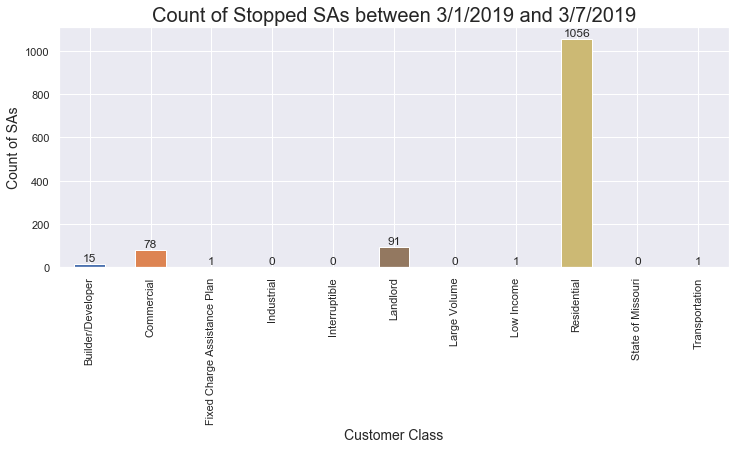

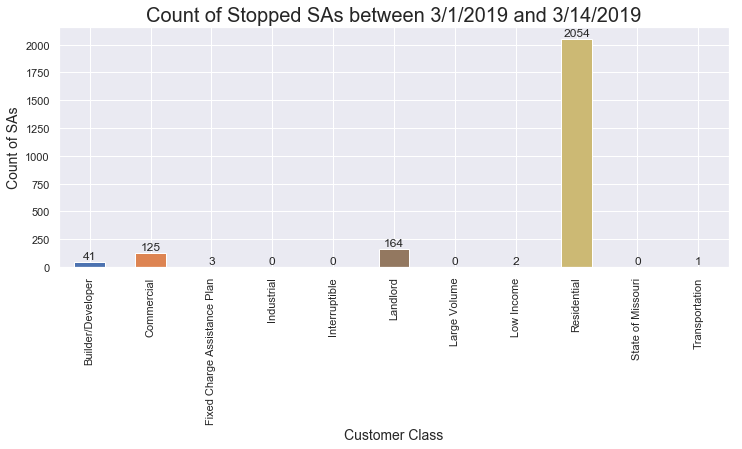

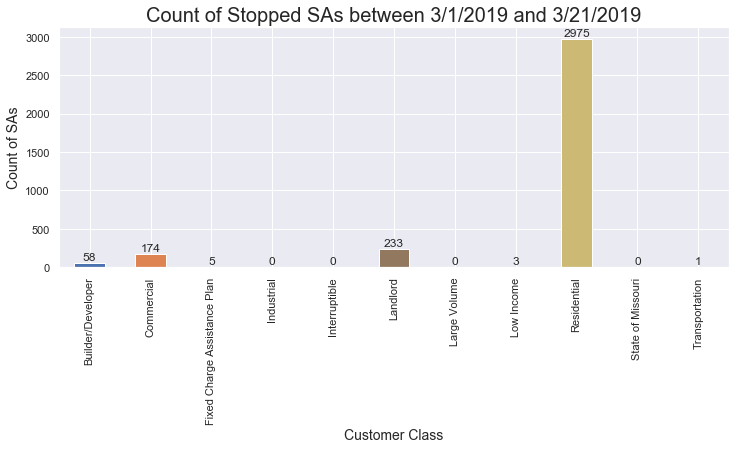

In [170]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)
plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CUSTOMER_CLASS_DESCRIPTION')['STOP_7_DAYS_FROM_20190301'].sum().plot(kind='bar')
plt1.set_title('Count of Stopped SAs between 3/1/2019 and 3/7/2019',fontsize= 20)
plt1.set_xlabel('Customer Class',fontsize= 14)
plt1.set_ylabel('Count of SAs',fontsize= 14)
add_value_labels(plt1,1)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,2)
plt2 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CUSTOMER_CLASS_DESCRIPTION')['STOP_14_DAYS_FROM_20190301'].sum().plot(kind='bar')
plt2.set_title('Count of Stopped SAs between 3/1/2019 and 3/14/2019',fontsize= 20)
plt2.set_xlabel('Customer Class',fontsize= 14)
plt2.set_ylabel('Count of SAs',fontsize= 14)
add_value_labels(plt2,1)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,3)

plt3 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CUSTOMER_CLASS_DESCRIPTION')['STOP_21_DAYS_FROM_20190301'].sum().plot(kind='bar')
plt3.set_title('Count of Stopped SAs between 3/1/2019 and 3/21/2019',fontsize= 20)
plt3.set_xlabel('Customer Class',fontsize= 14)
plt3.set_ylabel('Count of SAs',fontsize= 14)
add_value_labels(plt3,1)

plt.show()



### Count of Active SAs that were previously Stopped because of DNP.

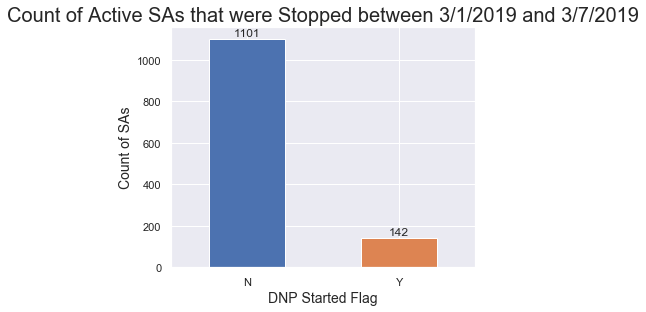

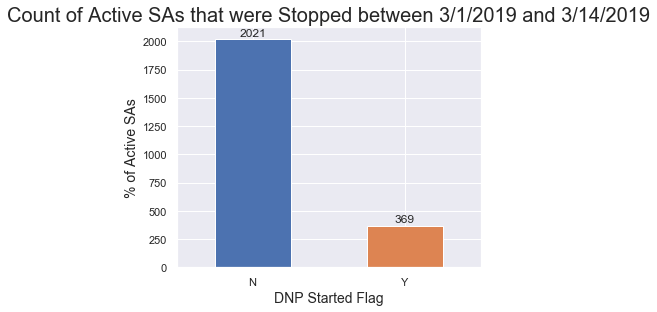

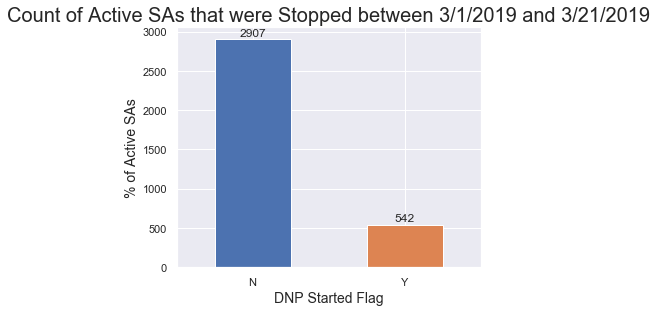

In [171]:
# Counts
plt.figure(figsize=(12,15))
plt.subplot(3,2,1)

plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_7_DAYS_FROM_20190301'] == 1 ) )].groupby('DNP_STARTED_FLAG')['STOP_7_DAYS_FROM_20190301'].count().plot(kind='bar')
plt1.set_title('Count of Active SAs that were Stopped between 3/1/2019 and 3/7/2019',fontsize= 20)
plt1.set_xlabel('DNP Started Flag',fontsize= 14)
plt1.set_ylabel('Count of SAs',fontsize= 14)
plt.xticks(rotation=0)
add_value_labels(plt1,1)

plt.figure(figsize=(12,15))
plt.subplot(3,2,2)

plt2 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_14_DAYS_FROM_20190301'] == 1 ))].groupby('DNP_STARTED_FLAG')['STOP_14_DAYS_FROM_20190301'].count().plot(kind='bar')
plt2.set_title('Count of Active SAs that were Stopped between 3/1/2019 and 3/14/2019',fontsize= 20)
plt2.set_xlabel('DNP Started Flag',fontsize= 14)
plt2.set_ylabel('% of Active SAs',fontsize= 14)
plt.xticks(rotation=0)
add_value_labels(plt2,1)

plt.figure(figsize=(12,15))
plt.subplot(3,2,3)

plt3 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1 ))].groupby('DNP_STARTED_FLAG')['STOP_21_DAYS_FROM_20190301'].count().plot(kind='bar')
plt3.set_title('Count of Active SAs that were Stopped between 3/1/2019 and 3/21/2019',fontsize= 20)
plt3.set_xlabel('DNP Started Flag',fontsize= 14)
plt3.set_ylabel('% of Active SAs',fontsize= 14)
plt.xticks(rotation=0)
add_value_labels(plt3,1)
plt.show()


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629614 entries, 98617454736 to 119996415468
Data columns (total 100 columns):
CIS_DIVISION                     629614 non-null object
ACCOUNT_ID                       629614 non-null object
CUSTOMER_CLASS_CODE              629614 non-null object
CUSTOMER_CLASS_DESCRIPTION       629614 non-null object
PERSON_ID                        629614 non-null object
SA_START_DATE                    629614 non-null datetime64[ns]
SA_START_YEAR                    629614 non-null object
SA_START_YEAR_MONTH              629614 non-null object
SA_END_DATE                      629614 non-null datetime64[ns]
SA_END_YEAR                      629614 non-null object
SA_END_YEAR_MONTH                629614 non-null object
SA_STATUS_FLAG                   629614 non-null object
SA_TYPE_CODE                     629614 non-null object
RATE_CLASS_CODE                  629614 non-null object
RATE_CLASS_DESCRIPTION           629614 non-null object
PREMISE_ID      

In [173]:
df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )]

,CIS_DIVISION,ACCOUNT_ID,CUSTOMER_CLASS_CODE,CUSTOMER_CLASS_DESCRIPTION,PERSON_ID,SA_START_DATE,SA_START_YEAR,SA_START_YEAR_MONTH,SA_END_DATE,SA_END_YEAR,...,PREMISE_DAYS_ACTIVE_BEFORE,PERSON_DAYS_ACTIVE_BEFORE,ACTIVE_DIFF_FROM_20190301,STOP_7_DAYS_FROM_20190301,STOP_14_DAYS_FROM_20190301,STOP_21_DAYS_FROM_20190301,ARREARS_PAYOFF_BUCKET,ARREARS_PAYOFF_BUCKET_2,USAGE_PAST_18_BUCKET,CURRENT_DAYS_ACTIVE_BUCKET
SA_ID,,,,,,,,,,,,,,,,,,,,,
3365268,LGC,1120000,RES,Residential,72015760000,1994-08-10,1994,199408,2099-12-31,2099,...,0,0,8969.0,0,0,0,8.0,2.0,7.0,8.0
6262536,MGE,2084444,RES,Residential,54864088888,1986-10-01,1986,198610,2099-12-31,2099,...,0,0,11839.0,0,0,0,0.0,0.0,7.0,9.0
6847716,LGC,2280000,RES,Residential,49489360000,1986-11-19,1986,198611,2099-12-31,2099,...,0,0,11790.0,0,0,0,8.0,2.0,7.0,9.0
8549904,MGE,2848888,RES,Residential,62239658208,2004-07-02,2004,200407,2019-09-04,2019,...,0,0,5355.0,0,0,0,8.0,2.0,7.0,6.0
10920864,LGC,3640000,RES,Residential,47265680000,1985-11-01,1985,198511,2099-12-31,2099,...,0,0,12173.0,0,0,0,6.0,1.0,3.0,9.0
12142908,LGC,4044000,RES,Residential,2805608000,2012-07-20,2012,201207,2099-12-31,2099,...,0,0,2415.0,0,0,0,7.0,2.0,7.0,4.0
12617424,MGE,4204444,RES,Residential,39232248888,2001-04-02,2001,200104,2099-12-31,2099,...,0,0,6542.0,0,0,0,9.0,3.0,9.0,7.0
85423559880,LGC,28440748056,RES,Residential,21295860584,2017-03-14,2017,201703,2019-03-05,2019,...,8387,0,717.0,1,1,1,7.0,2.0,8.0,2.0
40354636392,LGC,13475630028,RES,Residential,21632480000,2017-07-29,2017,201707,2019-05-28,2019,...,364,0,580.0,0,0,0,6.0,1.0,8.0,1.0


In [174]:
print_min_max(df[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1) & (df['CURRENT_DAYS_ACTIVE_BUCKET'] ==9) )],'ACTIVE_DIFF_FROM_20190301', 'min', '25')

      index  ACTIVE_DIFF_FROM_20190301
36  10531.0                          1
80  10561.0                          1
52  10682.0                          1
0   10804.0                         15
43  10849.0                          1
70  10852.0                          1
34  10889.0                          1
5   10896.0                          2
86  11138.0                          1
76  11244.0                          1
44  11413.0                          1
29  11472.0                          1
85  11473.0                          1
54  11493.0                          1
27  11616.0                          1
21  11633.0                          1
31  11680.0                          1
37  11717.0                          1
82  11763.0                          1
11  11778.0                          1
40  11869.0                          1
9   11895.0                          1
8   11931.0                          2
48  12022.0                          1
2   12081.0              

In [175]:

df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('ARREARS_PAYOFF_BUCKET')['ARREARS_PAYOFF_AMOUNT'].min()

ARREARS_PAYOFF_BUCKET
0.0    -99.94
6.0      0.00
7.0     95.84
8.0    138.12
9.0    203.19
Name: ARREARS_PAYOFF_AMOUNT, dtype: float64

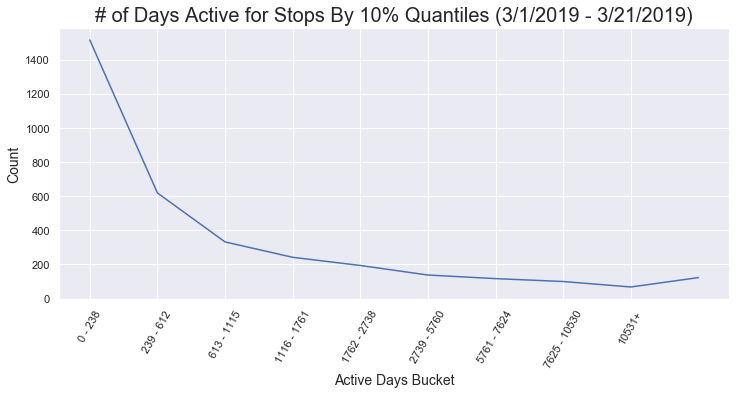

In [176]:
#df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('ARREARS_PAYOFF_BUCKET_2')['ARREARS_PAYOFF_AMOUNT'].min()
plt.figure(figsize=(12,5))

active_bucket_columns = ('0 - 238','239 - 612','613 - 1115','1116 - 1761','1762 - 2738','2739 - 5760','5761 - 7624','7625 - 10530','10531+')
_ = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_21_DAYS_FROM_20190301'] == 1 ))].groupby('CURRENT_DAYS_ACTIVE_BUCKET')['STOP_21_DAYS_FROM_20190301'].count().plot(kind='line',grid=True)
_.set_title('# of Days Active for Stops By 10% Quantiles (3/1/2019 - 3/21/2019)', fontsize=20)
_.set_xlabel('Active Days Bucket', fontsize=14)
_.set_ylabel('Count', fontsize=14)
_.set_xticks(np.arange(0, 9, step=1))
_.set_xticklabels(active_bucket_columns, rotation=60)
add_value_labels(_,1)
plt.show()

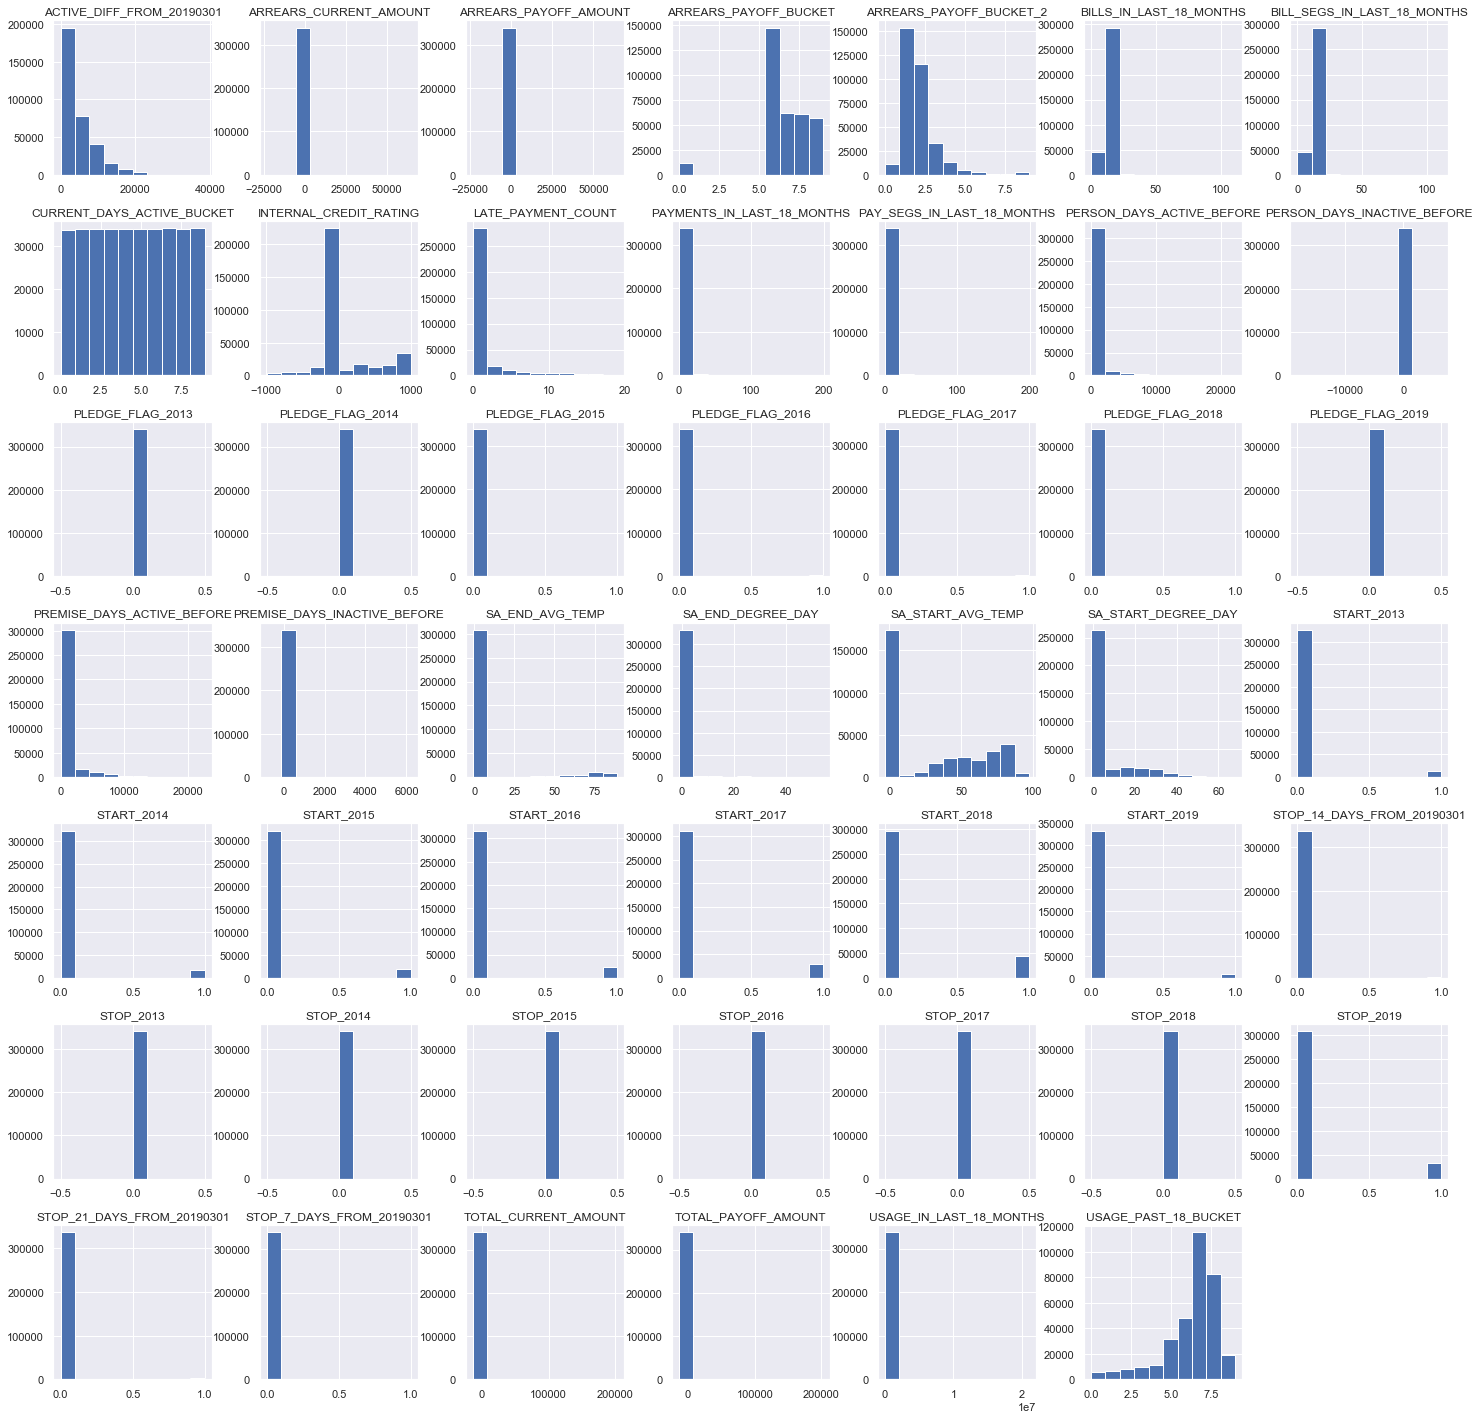

In [177]:
pd.DataFrame.hist(df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['INTERNAL_CREDIT_RATING'] <= 1000) & (df['INTERNAL_CREDIT_RATING'] >= -1000)  )], figsize= [25,25],color='b');

### Histograms of SAs stopped between 3/1/2019 and 3/7/2019


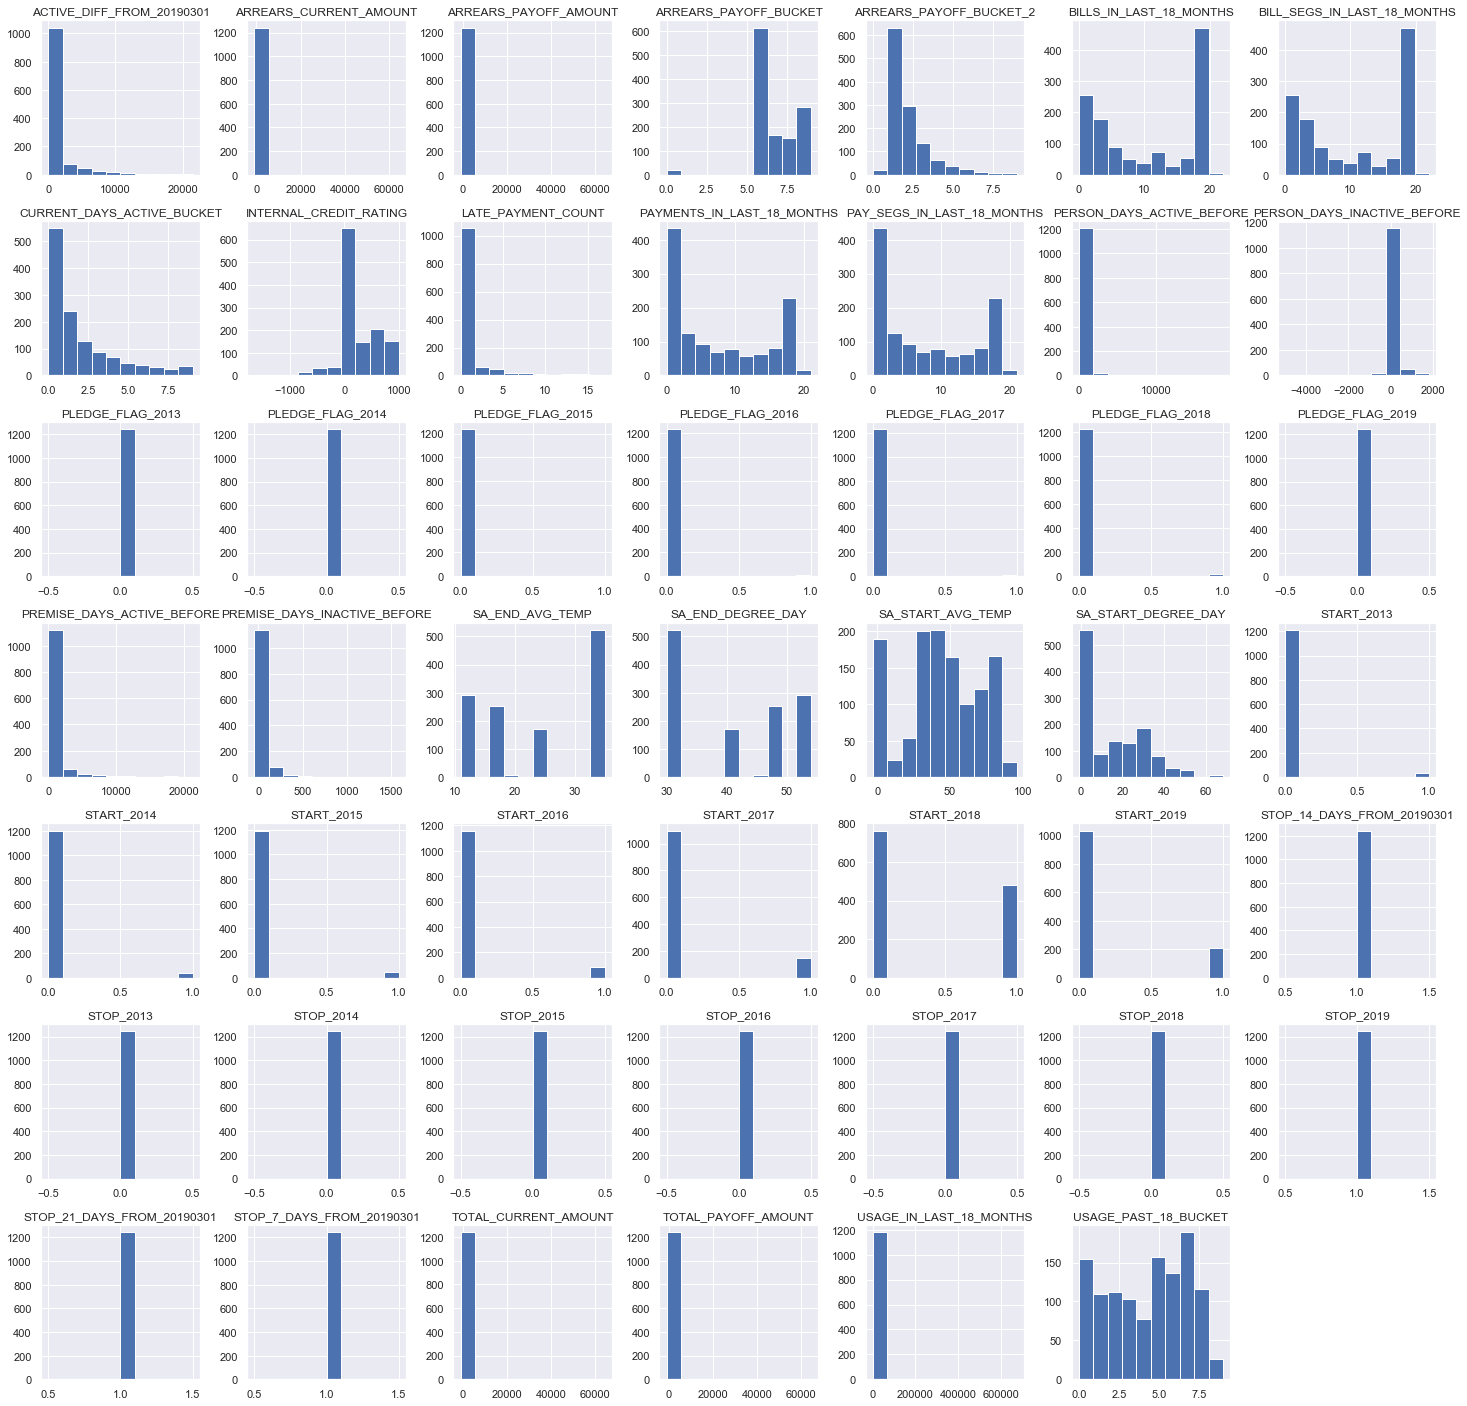

In [178]:
pd.DataFrame.hist(df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_7_DAYS_FROM_20190301'] == 1 ))], figsize= [25,25],color='b');

### Histograms of SAs stopped between 3/1/2019 and 3/14/2019


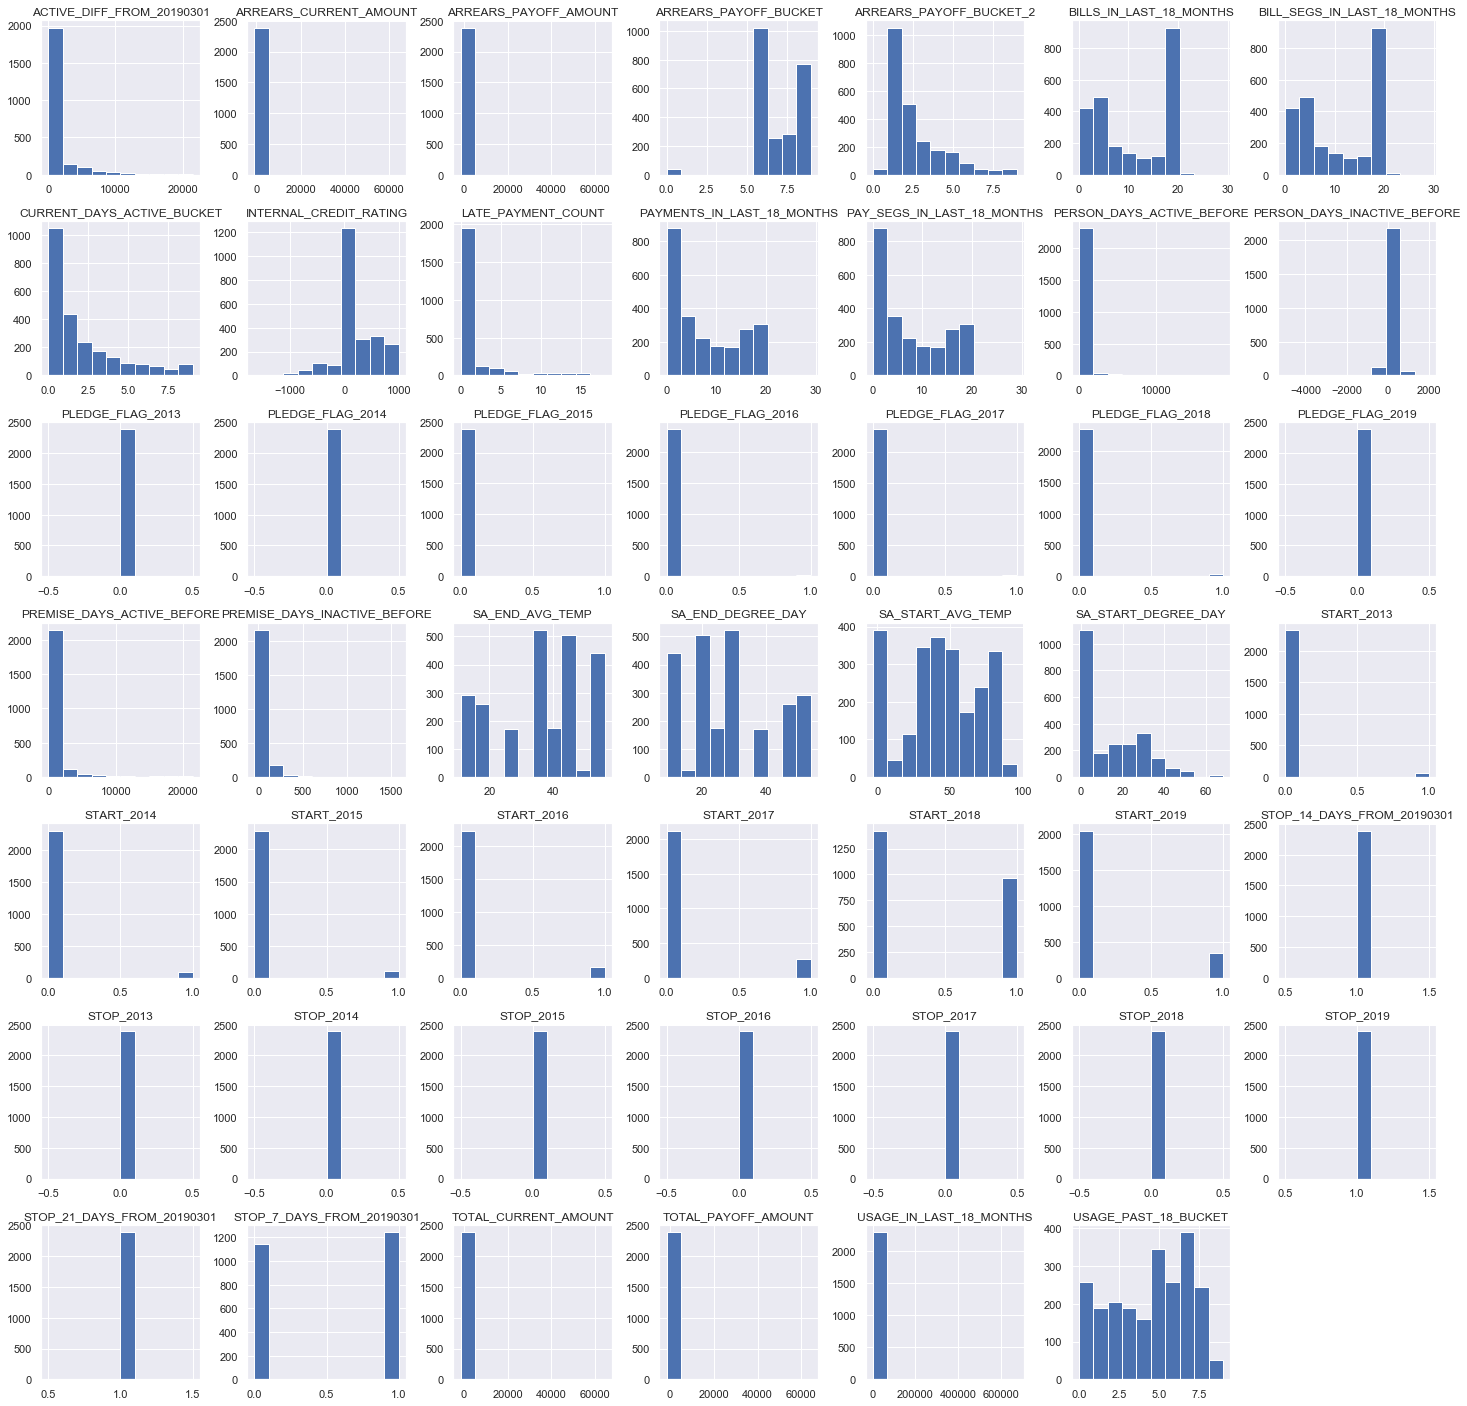

In [179]:
pd.DataFrame.hist(df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_14_DAYS_FROM_20190301'] == 1 ))], figsize= [25,25],color='b');

### Histograms of SAs stopped between 3/1/2019 and 3/21/2019


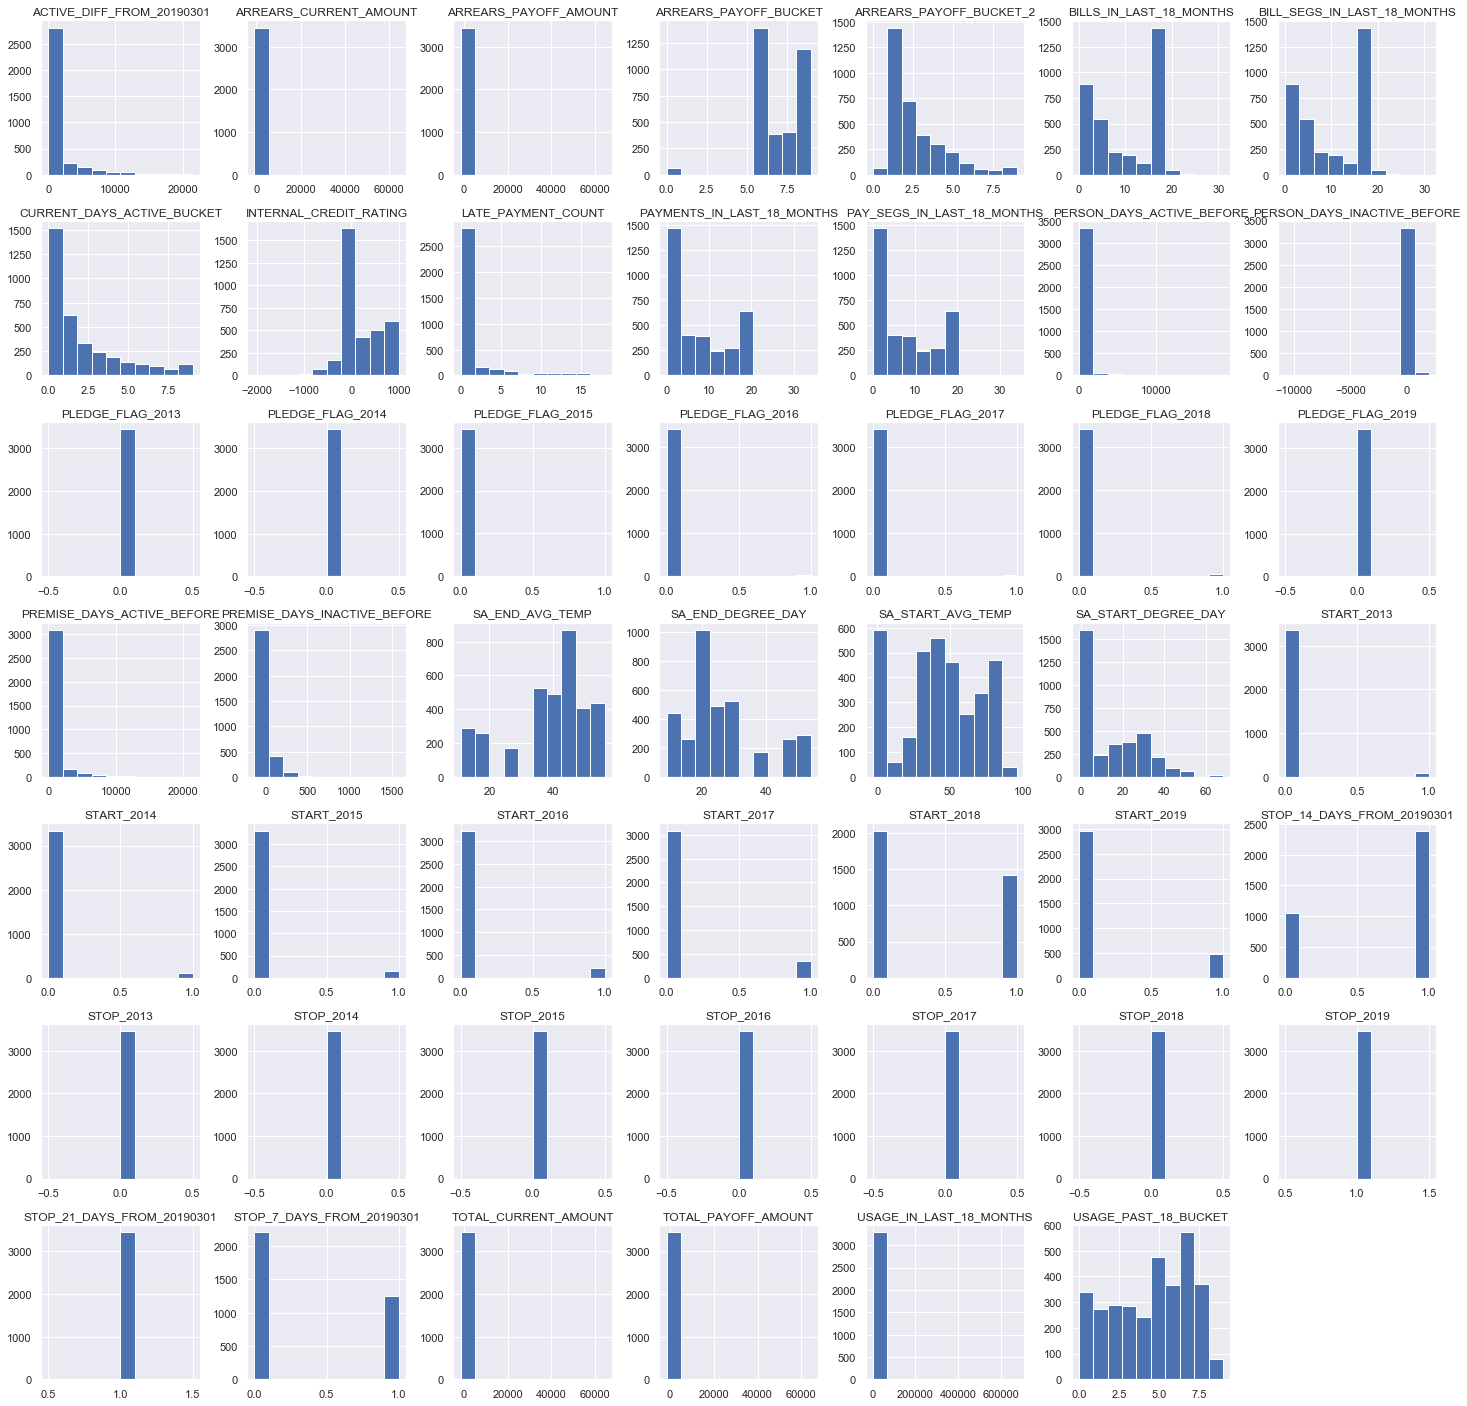

In [180]:
pd.DataFrame.hist(df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_21_DAYS_FROM_20190301'] == 1 ))], figsize= [25,25],color='b');

In [181]:
df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & df['STOP_21_DAYS_FROM_20190301'] == 1 )].groupby('DNP_STOPPED_FLAG').count()

,CIS_DIVISION,ACCOUNT_ID,CUSTOMER_CLASS_CODE,CUSTOMER_CLASS_DESCRIPTION,PERSON_ID,SA_START_DATE,SA_START_YEAR,SA_START_YEAR_MONTH,SA_END_DATE,SA_END_YEAR,...,PREMISE_DAYS_ACTIVE_BEFORE,PERSON_DAYS_ACTIVE_BEFORE,ACTIVE_DIFF_FROM_20190301,STOP_7_DAYS_FROM_20190301,STOP_14_DAYS_FROM_20190301,STOP_21_DAYS_FROM_20190301,ARREARS_PAYOFF_BUCKET,ARREARS_PAYOFF_BUCKET_2,USAGE_PAST_18_BUCKET,CURRENT_DAYS_ACTIVE_BUCKET
DNP_STOPPED_FLAG,,,,,,,,,,,,,,,,,,,,,
N,2809,2809,2809,2809,2809,2809,2809,2809,2809,2809,...,2809,2809,2809,2809,2809,2809,2792,2792,2652,2809
Y,640,640,640,640,640,640,640,640,640,640,...,640,640,640,640,640,640,640,640,640,640


In [182]:
df['DNP_STOPPED_FLAG'].loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & df['STOP_21_DAYS_FROM_20190301'] == 1 )]

SA_ID
85423559880     N
18796982808     Y
107207207100    N
84433723212     N
2737786524      N
58488245688     N
909856128       N
34112231076     N
655325712       N
700971984       Y
74397754536     N
1165575000      N
35774561724     N
84126663528     N
99154145316     Y
95166712572     N
1028663304      N
82289286036     N
26837169792     N
65332098660     N
1601761356      N
28312482900     N
1747929876      Y
85303202640     N
1001651628      N
58072056240     N
1895988168      Y
2050924140      N
93371611704     Y
45069878676     N
               ..
103121437140    N
118041260796    N
118200407100    Y
11958085644     N
1642505424      Y
99641218260     N
27198743712     N
118356258552    N
119392444704    N
23925311028     N
119660422860    N
43972750716     N
20720947944     N
118508413176    N
78529004136     N
30442319532     N
52027345968     N
34923373260     Y
118737250236    N
118787301240    N
118856528220    N
43961243460     Y
119094725388    N
89727880968     Y
1190

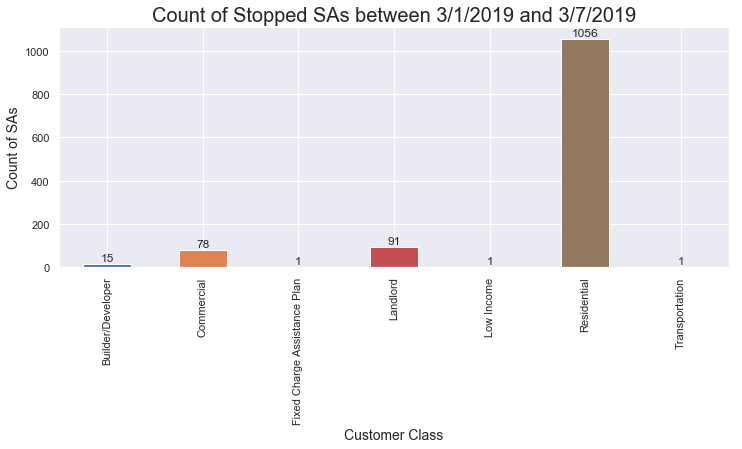

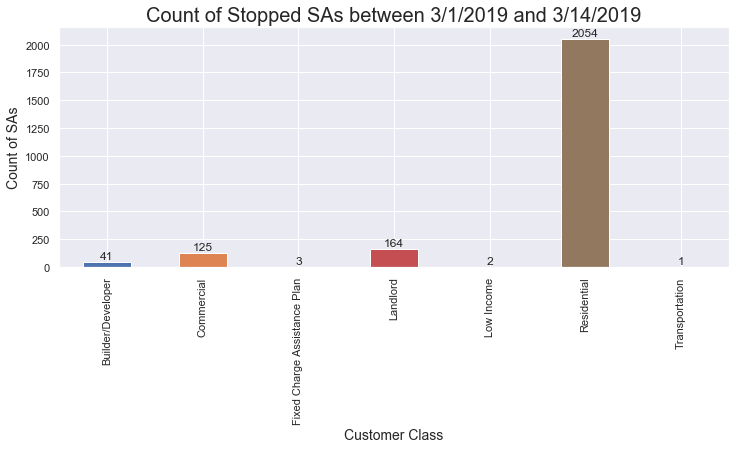

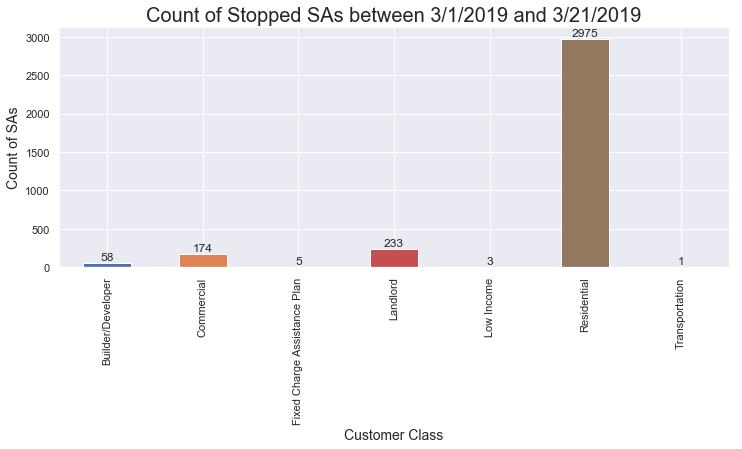

In [183]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)
plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_7_DAYS_FROM_20190301'] == 1))].groupby('CUSTOMER_CLASS_DESCRIPTION')['STOP_7_DAYS_FROM_20190301'].count().plot(kind='bar')
plt1.set_title('Count of Stopped SAs between 3/1/2019 and 3/7/2019',fontsize= 20)
plt1.set_xlabel('Customer Class',fontsize= 14)
plt1.set_ylabel('Count of SAs',fontsize= 14)
add_value_labels(plt1,1)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,2)
plt2 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_14_DAYS_FROM_20190301'] == 1))].groupby('CUSTOMER_CLASS_DESCRIPTION')['STOP_14_DAYS_FROM_20190301'].count().plot(kind='bar')
plt2.set_title('Count of Stopped SAs between 3/1/2019 and 3/14/2019',fontsize= 20)
plt2.set_xlabel('Customer Class',fontsize= 14)
plt2.set_ylabel('Count of SAs',fontsize= 14)
add_value_labels(plt2,1)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,3)

plt3 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1))].groupby('CUSTOMER_CLASS_DESCRIPTION')['STOP_21_DAYS_FROM_20190301'].count().plot(kind='bar')
plt3.set_title('Count of Stopped SAs between 3/1/2019 and 3/21/2019',fontsize= 20)
plt3.set_xlabel('Customer Class',fontsize= 14)
plt3.set_ylabel('Count of SAs',fontsize= 14)
add_value_labels(plt3,1)

plt.show()



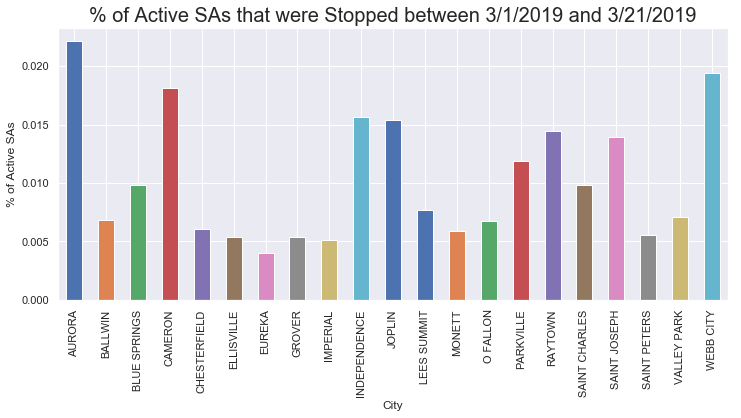

In [184]:
df.groupby('CITY')['STOP_21_DAYS_FROM_20190301'].mean()

plt.figure(figsize=(12,5))
plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CITY')['STOP_21_DAYS_FROM_20190301'].mean().plot(kind='bar')
plt1.set_title('% of Active SAs that were Stopped between 3/1/2019 and 3/21/2019',fontsize= 20)
plt1.set_xlabel('City')
plt1.set_ylabel('% of Active SAs')
#plt1.set_xticklabels(age_bucket_col_names)
# add_value_labels(plt1,1)

plt.show()


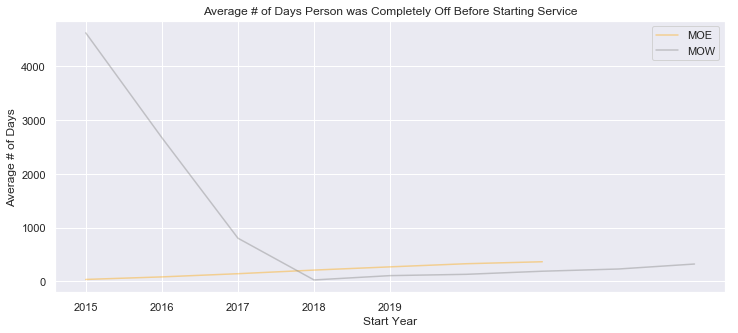

In [185]:

# Average # of Days Person was Off Before Starting Service
# Excluding Services that had another gas service at the same time which causes negative # of Days
# Only including a Person if they had service with us before.

plt1_column_names = ('2015','2016','2017','2018','2019')

plt.figure(figsize=(12,5))
plt1 = df[((df['SA_END_YEAR'] >= '2015')&(df['SA_END_YEAR'] <= '2020')&(df['CIS_DIVISION']=='LGC')&(df['PERSON_DAYS_INACTIVE_BEFORE']>=0)&(df['PERSON_PRIOR_STOP_DATE'].notnull()))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='line', color='orange', alpha=.4, grid=True, label='MOE')
plt1.set_title('Average # of Days Person was Completely Off Before Starting Service')

plt2 = df[((df['SA_END_YEAR'] >= '2015')&(df['SA_END_YEAR'] <= '2020')&(df['CIS_DIVISION']=='MGE')&(df['PERSON_DAYS_INACTIVE_BEFORE']>=0)&(df['PERSON_PRIOR_STOP_DATE'].notnull()))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='line', color='gray', alpha=.4, grid=True, label='MOW')

plt1.set_xlabel('Start Year')
plt1.set_ylabel('Average # of Days')

plt1.set_xticks(np.arange(len(plt1_column_names)))

plt1.set_xticklabels(plt1_column_names)

h1, l1 = plt1.get_legend_handles_labels() 

plt.legend(loc=0)

plt.show()

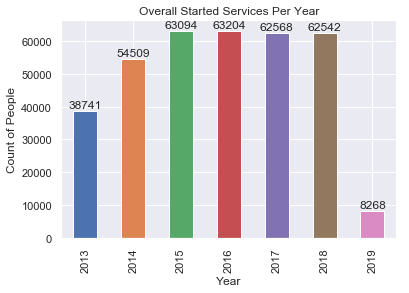

In [186]:
plt1 = df[(df['SA_START_YEAR'] >= '2013')].groupby('SA_START_YEAR')['ACCOUNT_ID'].count().plot(kind='bar')
plt1.set_title('Overall Started Services Per Year')
plt1.set_xlabel('Year')
plt1.set_ylabel('Count of People')
add_value_labels(plt1,1)

plt.show()

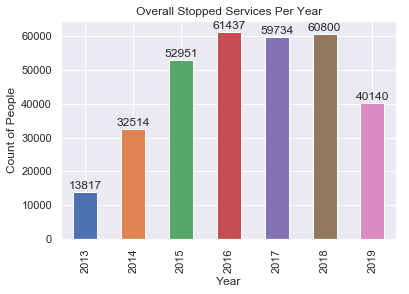

In [187]:
plt1 = df[((df['SA_END_YEAR'] >= '2013') & (df['SA_END_YEAR'] <= '2019'))].groupby('SA_END_YEAR')['ACCOUNT_ID'].count().plot(kind='bar')
plt1.set_title('Overall Stopped Services Per Year')
plt1.set_xlabel('Year')
plt1.set_ylabel('Count of People')
add_value_labels(plt1,1)

plt.show()

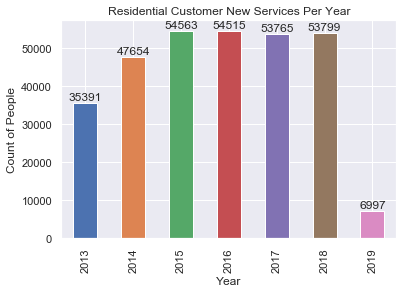

In [188]:
plt1 = df[((df['SA_START_YEAR'] >= '2013')&(df['CUSTOMER_CLASS_CODE'] == 'RES'))].groupby('SA_START_YEAR')['ACCOUNT_ID'].count().plot(kind='bar')
plt1.set_title('Residential Customer New Services Per Year')
plt1.set_xlabel('Year')
plt1.set_ylabel('Count of People')
add_value_labels(plt1,1)

plt.show()

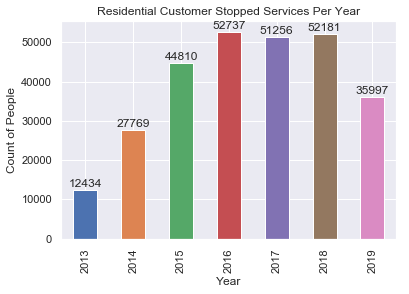

In [189]:
plt1 = df[((df['SA_END_YEAR'] >= '2013') & (df['SA_END_YEAR'] <= '2019')
           &(df['CUSTOMER_CLASS_CODE'] == 'RES'))].groupby('SA_END_YEAR')['ACCOUNT_ID'].count().plot(kind='bar')
plt1.set_title('Residential Customer Stopped Services Per Year')
plt1.set_xlabel('Year')
plt1.set_ylabel('Count of People')
add_value_labels(plt1,1)

plt.show()

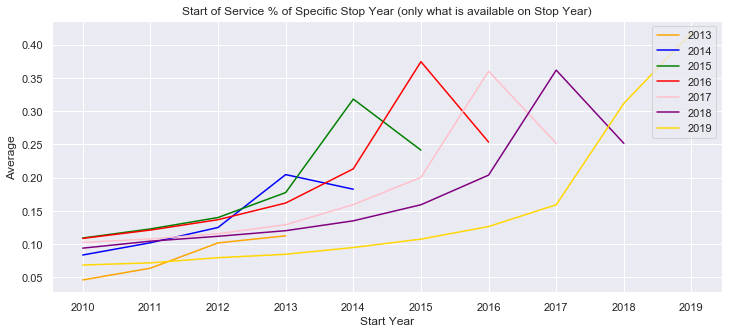

In [190]:
plt1_column_names = ('2010','2011','2012','2013','2014','2015','2016','2017','2018','2019')

plt.figure(figsize=(12,5))
plt1 = df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2013'].mean().plot(kind='line', color='orange', grid=True, label='2013')
plt1.set_title('Start of Service % of Specific Stop Year (only what is available on Stop Year)')

plt2 = df[((df['SA_START_YEAR'] <= '2014')&(df['SA_END_YEAR'] >= '2014')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2014'].mean().plot(kind='line', color='blue', grid=True, label='2014')
plt3 = df[((df['SA_START_YEAR'] <= '2015')&(df['SA_END_YEAR'] >= '2015')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2015'].mean().plot(kind='line', color='green', grid=True, label='2015')
plt4 = df[((df['SA_START_YEAR'] <= '2016')&(df['SA_END_YEAR'] >= '2016')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2016'].mean().plot(kind='line', color='red', grid=True, label='2016')
plt5 = df[((df['SA_START_YEAR'] <= '2017')&(df['SA_END_YEAR'] >= '2017')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2017'].mean().plot(kind='line', color='pink', grid=True, label='2017')
plt6 = df[((df['SA_START_YEAR'] <= '2018')&(df['SA_END_YEAR'] >= '2018')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2018'].mean().plot(kind='line', color='purple', grid=True, label='2018')
plt7 = df[((df['SA_START_YEAR'] <= '2019')&(df['SA_END_YEAR'] >= '2019')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2019'].mean().plot(kind='line', color='gold', grid=True, label='2019')

plt1.set_xlabel('Start Year')
plt1.set_ylabel('Average')

plt1.set_xticks(np.arange(len(plt1_column_names)))

plt1.set_xticklabels(plt1_column_names)

h1, l1 = plt7.get_legend_handles_labels() 

plt.legend(h1, l1, loc=1)

plt.show()

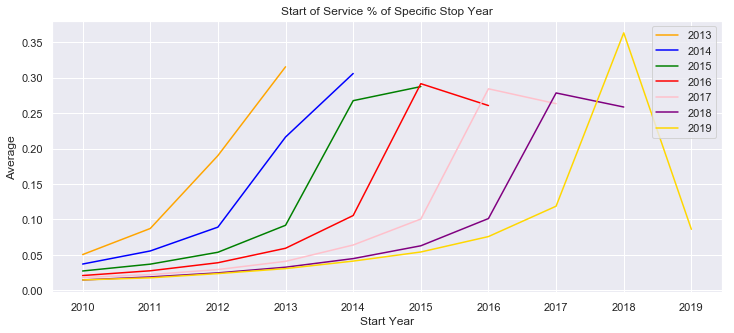

In [191]:
--20190910
plt1_column_names = ('2010','2011','2012','2013','2014','2015','2016','2017','2018','2019')

plt.figure(figsize=(12,5))
plt1 = df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2013'].sum().divide(df['STOP_2013'][((df['STOP_2013'] == 1))].sum()).plot(kind='line', color='orange', grid=True, label='2013')
plt1.set_title('Start of Service % of Specific Stop Year')

plt2 = df[((df['SA_START_YEAR'] <= '2014')&(df['SA_END_YEAR'] >= '2014')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2014'].sum().divide(df['STOP_2014'][((df['STOP_2014'] == 1))].sum()).plot(kind='line', color='blue', grid=True, label='2014')
plt3 = df[((df['SA_START_YEAR'] <= '2015')&(df['SA_END_YEAR'] >= '2015')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2015'].sum().divide(df['STOP_2015'][((df['STOP_2015'] == 1))].sum()).plot(kind='line', color='green', grid=True, label='2015')
plt4 = df[((df['SA_START_YEAR'] <= '2016')&(df['SA_END_YEAR'] >= '2016')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2016'].sum().divide(df['STOP_2016'][((df['STOP_2016'] == 1))].sum()).plot(kind='line', color='red', grid=True, label='2016')
plt5 = df[((df['SA_START_YEAR'] <= '2017')&(df['SA_END_YEAR'] >= '2017')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2017'].sum().divide(df['STOP_2017'][((df['STOP_2017'] == 1))].sum()).plot(kind='line', color='pink', grid=True, label='2017')
plt6 = df[((df['SA_START_YEAR'] <= '2018')&(df['SA_END_YEAR'] >= '2018')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2018'].sum().divide(df['STOP_2018'][((df['STOP_2018'] == 1))].sum()).plot(kind='line', color='purple', grid=True, label='2018')
plt7 = df[((df['SA_START_YEAR'] <= '2019')&(df['SA_END_YEAR'] >= '2019')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2019'].sum().divide(df['STOP_2019'][((df['STOP_2019'] == 1))].sum()).plot(kind='line', color='gold', grid=True, label='2019')

plt1.set_xlabel('Start Year')
plt1.set_ylabel('Average')

plt1.set_xticks(np.arange(len(plt1_column_names)))

plt1.set_xticklabels(plt1_column_names)

h1, l1 = plt7.get_legend_handles_labels() 

plt.legend(h1, l1, loc=1)

plt.show()

In [192]:
df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2013'].mean()
#df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013'))].head(10)

SA_START_YEAR
2010    0.046161
2011    0.063825
2012    0.101826
2013    0.112491
Name: STOP_2013, dtype: float64

In [193]:
df[((df['SA_START_YEAR'] <= '2018')&(df['SA_END_YEAR'] >= '2018')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2018'].count()
#df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013'))].head(10)

SA_START_YEAR
2010     9378
2011    10907
2012    13306
2013    16424
2014    20102
2015    23957
2016    30202
2017    46836
2018    62542
Name: STOP_2018, dtype: int64

In [194]:
df[((df['SA_START_YEAR'] <= '2018')&(df['SA_END_YEAR'] >= '2018')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2018'].sum()
#df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013'))].head(10)

SA_START_YEAR
2010      881
2011     1139
2012     1487
2013     1974
2014     2714
2015     3813
2016     6152
2017    16932
2018    15724
Name: STOP_2018, dtype: int64

In [195]:
df[((df['SA_START_YEAR'] == '2017'))].groupby(('SA_END_YEAR')).count()

,CIS_DIVISION,ACCOUNT_ID,CUSTOMER_CLASS_CODE,CUSTOMER_CLASS_DESCRIPTION,PERSON_ID,SA_START_DATE,SA_START_YEAR,SA_START_YEAR_MONTH,SA_END_DATE,SA_END_YEAR_MONTH,...,PREMISE_DAYS_ACTIVE_BEFORE,PERSON_DAYS_ACTIVE_BEFORE,ACTIVE_DIFF_FROM_20190301,STOP_7_DAYS_FROM_20190301,STOP_14_DAYS_FROM_20190301,STOP_21_DAYS_FROM_20190301,ARREARS_PAYOFF_BUCKET,ARREARS_PAYOFF_BUCKET_2,USAGE_PAST_18_BUCKET,CURRENT_DAYS_ACTIVE_BUCKET
SA_END_YEAR,,,,,,,,,,,,,,,,,,,,,
2017,15732,15732,15732,15732,15732,15732,15732,15732,15732,15732,...,15732,15732,0,15732,15732,15732,15731,15731,7134,0
2018,16932,16932,16932,16932,16932,16932,16932,16932,16932,16932,...,16932,16932,0,16932,16932,16932,16928,16928,16932,0
2019,4761,4761,4761,4761,4761,4761,4761,4761,4761,4761,...,4761,4761,3962,4761,4761,4761,4736,4736,4759,3962
2099,25143,25143,25143,25143,25143,25143,25143,25143,25143,25143,...,25143,25143,25143,25143,25143,25143,24969,24969,25140,25143


In [196]:
df[((df['SA_START_YEAR'] == '2017'))].count()

CIS_DIVISION                     62568
ACCOUNT_ID                       62568
CUSTOMER_CLASS_CODE              62568
CUSTOMER_CLASS_DESCRIPTION       62568
PERSON_ID                        62568
SA_START_DATE                    62568
SA_START_YEAR                    62568
SA_START_YEAR_MONTH              62568
SA_END_DATE                      62568
SA_END_YEAR                      62568
SA_END_YEAR_MONTH                62568
SA_STATUS_FLAG                   62568
SA_TYPE_CODE                     62568
RATE_CLASS_CODE                  62568
RATE_CLASS_DESCRIPTION           62568
PREMISE_ID                       62568
CITY                             62568
STATE                            62568
POSTAL                           62568
BILL_CYCLE_CODE                  62568
BILL_CYCLE_DESCRIPTION           62568
SERVICE_TYPE_CODE                62568
PREMISE_TYPE_CODE                62568
TREND_AREA_CODE                  62568
OFFICE_LOCATION                  62568
OFFICE_LOCATION_DESCRIPTI

In [197]:
df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2013'].sum()

SA_START_YEAR
2010     695
2011    1204
2012    2626
2013    4358
Name: STOP_2013, dtype: int64

In [198]:
df['STOP_2013'][((df['STOP_2013'] == 1))].sum()

13817

In [199]:
df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2013'].sum().divide(df['STOP_2013'][((df['STOP_2013'] == 1))].sum())

SA_START_YEAR
2010    0.050300
2011    0.087139
2012    0.190056
2013    0.315409
Name: STOP_2013, dtype: float64

In [200]:
df.groupby(['SA_END_YEAR'])['SA_START_YEAR'].describe()

,count,unique,top,freq
SA_END_YEAR,,,,
1993,1,1,1993,1
1994,2,2,1986,1
1995,3,2,1993,2
1996,3,3,1986,1
1997,3,3,1985,1
1998,28,10,1998,8
1999,1,1,1987,1
2001,2,2,1991,1
2002,1,1,2001,1


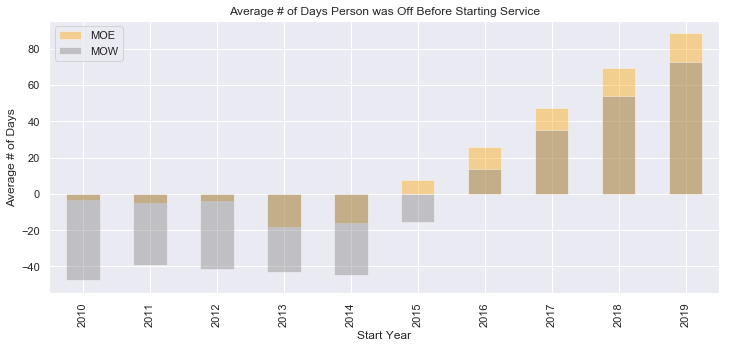

In [201]:

# Average # of Days Person was Off Before Starting Service

plt.figure(figsize=(12,5))
plt1 = df[((df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020')&(df['CIS_DIVISION']=='LGC'))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='bar', color='orange', alpha=.4, grid=True, label='MOE')
plt1.set_title('Average # of Days Person was Off Before Starting Service')

plt2 = df[((df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020')&(df['CIS_DIVISION']=='MGE'))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='bar', color='gray', alpha=.4, grid=True, label='MOW')

plt1.set_xlabel('Start Year')
plt1.set_ylabel('Average # of Days')

#plt1.set_xticks(np.arange(len(plt1_column_names)))

#plt1.set_xticklabels(plt1_column_names)

#h1, l1 = plt7.get_legend_handles_labels() 

plt.legend(loc=0)

plt.show()

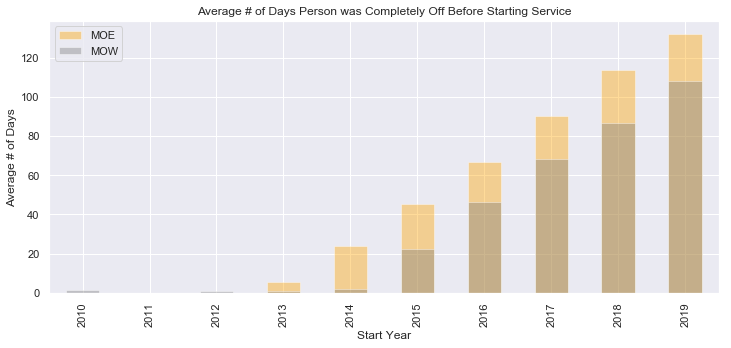

In [202]:

# Average # of Days Person was Off Before Starting Service
# Excluding Services that had another gas service at the same time which causes negative # of Days

plt.figure(figsize=(12,5))
plt1 = df[((df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020')&(df['CIS_DIVISION']=='LGC')&(df['PERSON_DAYS_INACTIVE_BEFORE']>=0))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='bar', color='orange', alpha=.4, grid=True, label='MOE')
plt1.set_title('Average # of Days Person was Completely Off Before Starting Service')

plt2 = df[((df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020')&(df['CIS_DIVISION']=='MGE')&(df['PERSON_DAYS_INACTIVE_BEFORE']>=0))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='bar', color='gray', alpha=.4, grid=True, label='MOW')

plt1.set_xlabel('Start Year')
plt1.set_ylabel('Average # of Days')

#plt1.set_xticks(np.arange(len(plt1_column_names)))

#plt1.set_xticklabels(plt1_column_names)

#h1, l1 = plt7.get_legend_handles_labels() 

plt.legend(loc=0)

plt.show()

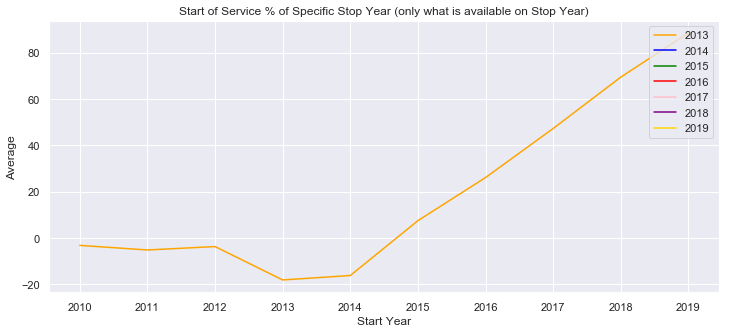

In [203]:
plt1_column_names = ('2010','2011','2012','2013','2014','2015','2016','2017','2018','2019')

plt.figure(figsize=(12,5))
plt1 = df[((df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020')&(df['CIS_DIVISION']=='LGC'))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='line', color='orange', grid=True, label='2013')
plt1.set_title('Start of Service % of Specific Stop Year (only what is available on Stop Year)')

#plt2 = df[((df['SA_START_YEAR'] <= '2014')&(df['SA_END_YEAR'] >= '2014')
#   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='line', color='blue', grid=True, label='2014')
#plt3 = df[((df['SA_START_YEAR'] <= '2015')&(df['SA_END_YEAR'] >= '2015')
#   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2015'].mean().plot(kind='line', color='green', grid=True, label='2015')
#plt4 = df[((df['SA_START_YEAR'] <= '2016')&(df['SA_END_YEAR'] >= '2016')
#   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2016'].mean().plot(kind='line', color='red', grid=True, label='2016')
#plt5 = df[((df['SA_START_YEAR'] <= '2017')&(df['SA_END_YEAR'] >= '2017')
#   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2017'].mean().plot(kind='line', color='pink', grid=True, label='2017')
#plt6 = df[((df['SA_START_YEAR'] <= '2018')&(df['SA_END_YEAR'] >= '2018')
#   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2018'].mean().plot(kind='line', color='purple', grid=True, label='2018')
#plt7 = df[((df['SA_START_YEAR'] <= '2019')&(df['SA_END_YEAR'] >= '2019')
#   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2019'].mean().plot(kind='line', color='gold', grid=True, label='2019')

plt1.set_xlabel('Start Year')
plt1.set_ylabel('Average')

plt1.set_xticks(np.arange(len(plt1_column_names)))

plt1.set_xticklabels(plt1_column_names)

h1, l1 = plt7.get_legend_handles_labels() 

plt.legend(h1, l1, loc=1)

plt.show()

In [204]:
print_min_max(df[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1) )],'ACTIVE_DIFF_FROM_20190301', 'min', '25')

     index  ACTIVE_DIFF_FROM_20190301
18     1.0                         17
21     2.0                         16
33     3.0                         14
61     4.0                         10
701    5.0                          1
379    6.0                          2
120    7.0                          6
176    8.0                          4
19     9.0                         16
15    10.0                         17
257   11.0                          3
713   13.0                          1
363   14.0                          2
106   15.0                          6
40    16.0                         13
23    17.0                         15
93    18.0                          7
700   19.0                          1
359   20.0                          2
134   21.0                          5
67    22.0                          9
24    23.0                         15
14    24.0                         17
10    25.0                         20
184   27.0                          4
